## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Model Approach

 Build a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps to be followed to build a model using advance regression. This will help us predict prices and determine predictor variables.
- Importing and understanding the data.
- Data prepartion and data cleaning.
- Exploratory data analysis to find out the inference about the data and its correlation with the target variables.
- Feature Selection and Data Modelling
- Splitting the data into train and test
- Performing appropriate regression techniques
- Checking the fit of the model along with Multicolinearity etc.
- Perform Ridge and Lasso to have fundamental feature selection to create a generalised model

## Model Objective:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

## 1. Including relevant libraries

In [823]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 500)

## 2. Reading Data


In [824]:
#Read the data and creating the dataframe
housing_df=pd.read_csv("train.csv")

In [825]:
# reading fe records
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [826]:
# inspect the first five rows of data
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [827]:
# check the no of rows and columns
housing_df.shape

(1460, 81)

In [828]:
# total columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [829]:
# information about complete dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [830]:
# describing the data
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

It is clearly visible from dataframe information that some of the data is null.

## 3. Data Cleaning

### 3.1 Handling null values

In [831]:
# Check if any null values are present in the data
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin


### 3.1.2 Finding and removing/replacing null values

In [832]:
# find out percentage of null values in data
round(housing_df.isnull().sum()/len(housing_df.index) * 100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

**From above it is quite evident that Pool Quality , MiscFeature , Fence and Alley have very high percentage of null values . Hence removing these.**
**We can remove Id column as it is of no use**

In [833]:
# remving almost null coulumns. Id
housing_df.drop(['Alley','PoolQC','MiscFeature', 'Fence', 'Id'],axis=1,inplace = True)

housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

Now we are left with 76 columns.

In [834]:
# count the number of null values present in the data

round(housing_df.isnull().sum()/len(housing_df.index)*100,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

 **We still have a few null columns . It is important  to check them individually and see if we can replace some values .**

In [835]:
#Checking the no of unique values in each column
housing_df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [836]:
# check null values in FireplaceQu
housing_df['FireplaceQu'].value_counts()/len(housing_df['FireplaceQu'])*100

FireplaceQu
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: count, dtype: float64

In [837]:
# check null values in MasVnrType
housing_df['MasVnrType'].value_counts()/len(housing_df['MasVnrType'])*100

MasVnrType
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: count, dtype: float64

In [838]:
# check null values in MasVnrType
housing_df['LotFrontage'].value_counts()/len(housing_df['LotFrontage'])*100

LotFrontage
60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
21.0     1.575342
90.0     1.575342
68.0     1.301370
64.0     1.301370
24.0     1.301370
73.0     1.232877
55.0     1.164384
63.0     1.164384
79.0     1.164384
72.0     1.164384
100.0    1.095890
66.0     1.027397
74.0     1.027397
51.0     1.027397
52.0     0.958904
59.0     0.890411
82.0     0.821918
71.0     0.821918
67.0     0.821918
43.0     0.821918
40.0     0.821918
57.0     0.821918
76.0     0.753425
69.0     0.753425
92.0     0.684932
34.0     0.684932
53.0     0.684932
86.0     0.684932
88.0     0.684932
84.0     0.616438
35.0     0.616438
62.0     0.616438
44.0     0.616438
77.0     0.616438
93.0     0.547945
98.0     0.547945
96.0     0.547945
61.0     0.547945
95.0     0.479452
58.0     0.479452
120.0    0.479452
107.0    0.479452
94.0     0.410959
81.0     0.410959
36.0     0.410959
30.0     0.410959
48.0     0.41095

In [839]:
housing_df['GarageCond'].value_counts()/len(housing_df['GarageCond'])*100

GarageCond
TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: count, dtype: float64

In [840]:
housing_df['GarageType'].value_counts()/len(housing_df['GarageType'])*100

GarageType
Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: count, dtype: float64

In [841]:
housing_df['GarageQual'].value_counts()/len(housing_df['GarageQual'])*100

GarageQual
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: count, dtype: float64

In [842]:
housing_df['GarageFinish'].value_counts()/len(housing_df['GarageFinish'])*100

GarageFinish
Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: count, dtype: float64

In [843]:
housing_df['GarageYrBlt'].value_counts()/len(housing_df['GarageYrBlt'])*100

GarageYrBlt
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
1977.0    2.397260
1998.0    2.123288
1999.0    2.054795
1976.0    1.986301
2008.0    1.986301
2000.0    1.849315
1968.0    1.780822
2002.0    1.780822
1950.0    1.643836
1993.0    1.506849
1958.0    1.438356
1966.0    1.438356
2009.0    1.438356
1962.0    1.438356
1965.0    1.438356
1970.0    1.369863
1996.0    1.369863
1957.0    1.369863
2001.0    1.369863
1978.0    1.301370
1954.0    1.301370
1960.0    1.301370
1997.0    1.301370
1974.0    1.232877
1964.0    1.232877
1994.0    1.232877
1995.0    1.232877
1959.0    1.164384
1956.0    1.095890
1963.0    1.095890
1990.0    1.095890
1980.0    1.027397
1979.0    1.027397
1969.0    1.027397
1967.0    1.027397
1973.0    0.958904
1988.0    0.958904
1920.0    0.958904
1972.0    0.958904
1940.0    0.958904
1992.0    0.890411
1961.0    0.890411
1971.0    0.890411
1955.0    0.890411
1953.0    0.821918
1948.0    0.753425
1987.0    0.753425


**Masonry veneer type has 60 percent null values. FireplaceQu has 47 percent null values. These can be removed.**
**GarageCond , GarageQual  have almost the same data throughout. Since the contribution by them in saleprice is less , they can be removed**

In [844]:
# removing unecessary columns
housing_df.drop(['GarageQual','GarageCond','MasVnrType', 'FireplaceQu'],axis=1,inplace = True)

In [845]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [846]:
# Checking for the percentage of Null values

missing_df=pd.DataFrame((round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)), columns=['missing'])
missing_df.sort_values(by=['missing'], ascending=False).head(20)

missing
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtQual         2.53
BsmtCond         2.53
MasVnrArea       0.55
Electrical       0.07
HalfBath         0.00
TotRmsAbvGrd     0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
GrLivArea        0.00
LowQualFinSF     0.00

**Handling columns with numerical values**

In [847]:
# Treating the NaN Values
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)
housing_df['Electrical'] = housing_df['Electrical'].fillna("Other")

In [848]:
# Dropping the LotFontgage columns as it have more Null values
housing_df.drop("LotFrontage",axis = 1, inplace=True)

**Handling categorical columns with null values**

In [849]:
housing_df['BsmtFinType1'].head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [850]:
housing_df['BsmtFinType1'].value_counts()/len(housing_df['BsmtFinType1'])*100

BsmtFinType1
Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: count, dtype: float64

In [851]:
housing_df['BsmtExposure'].value_counts()/len(housing_df['BsmtExposure'])*100

BsmtExposure
No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: count, dtype: float64

In [852]:
# Imputing the Nan Values with 'No Basement_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing_df[col] = housing_df[col].fillna('No_Basement')

In [853]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish'):
    housing_df[col] = housing_df[col].fillna('No_Garage')

In [854]:
housing_df['BsmtExposure'].value_counts()/len(housing_df['BsmtExposure'])*100

BsmtExposure
No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No_Basement     2.602740
Name: count, dtype: float64

In [855]:
# info of remenant housing data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [856]:
#checking for any null values
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

### 3.2 Remove duplicate/ non-variant data

In [857]:
# check if any duplicates exist in the data
duplicate_df = housing_df[housing_df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 71 columns]

**No duplicates exist in the data**

### 3.3 Check for data that has less than 2-3 unique values

In [858]:
# function to check all non-variant data which is same for most records . Such columns do not contribute to any variance 
def findNonVariantColumns():
    columnList = []   
    for col in (housing_df):
        if(housing_df[col].value_counts().max() >= 1460*90/100):
            columnList.append(col)
      # Remove the columns with skewed data
    return columnList
   

In [859]:
# find and print all the column list
repeatedColList = findNonVariantColumns()
print(repeatedColList)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [860]:
#let visually verify the same
housing_df['Street'].value_counts()/len(housing_df['Street'])*100

Street
Pave    99.589041
Grvl     0.410959
Name: count, dtype: float64

In [861]:
#let visually verify the same
housing_df['Heating'].value_counts()/len(housing_df['Heating'])*100

Heating
GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: count, dtype: float64

In [862]:
#let visually verify the same
housing_df['CentralAir'].value_counts()/len(housing_df['CentralAir'])*100

CentralAir
Y    93.493151
N     6.506849
Name: count, dtype: float64

In [863]:
#let visually verify the same
housing_df['Electrical'].value_counts()/len(housing_df['Electrical'])*100

Electrical
SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Other     0.068493
Name: count, dtype: float64

**It is clearly evident the above list actually has almost 90% of data same. Since it shows no variance it can be removed in prediction of sale price.**

In [864]:
housing_df.drop(repeatedColList, inplace=True, axis=1)
housing_df.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig Neighborhood  \
0          60       RL     8450      Reg         Lvl    Inside      CollgCr   
1          20       RL     9600      Reg         Lvl       FR2      Veenker   
2          60       RL    11250      IR1         Lvl    Inside      CollgCr   
3          70       RL     9550      IR1         Lvl    Corner      Crawfor   
4          60       RL    14260      IR1         Lvl       FR2      NoRidge   

  Condition1 BldgType HouseStyle  ...  GarageCars  GarageArea  WoodDeckSF  \
0       Norm     1Fam     2Story  ...           2         548           0   
1      Feedr     1Fam     1Story  ...           2         460         298   
2       Norm     1Fam     2Story  ...           2         608           0   
3       Norm     1Fam     2Story  ...           3         642           0   
4       Norm     1Fam     2Story  ...           3         836         192   

   OpenPorchSF EnclosedPorch MoSold YrSold  SaleType SaleCondition SalePrice  
0           61             0      2   2008        WD        Normal    208500  
1            0             0      5   2007        WD        Normal    181500  
2           42             0      9   2008        WD        Normal    223500  
3           35           272      2   2006        WD       Abnorml    140000  
4           84             0     12   2008        WD        Normal    250000  

[5 rows x 54 columns]

## 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate and Bivariate analysis

**Lets analyse the salesprices first**

<Axes: xlabel='SalePrice', ylabel='Density'>

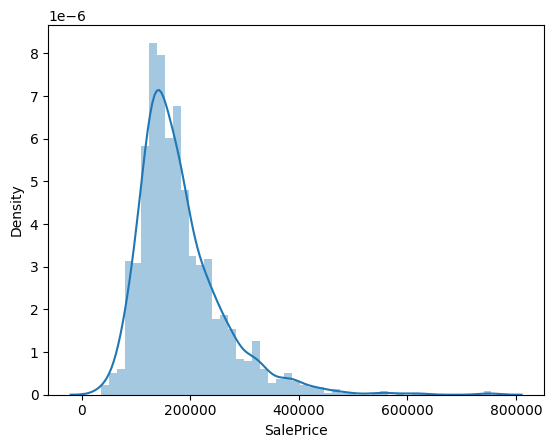

In [865]:
sns.distplot(housing_df['SalePrice'])

**The salesprices are concentrated towards 100000 and 400000 as evident from the density plot.**

<Axes: xlabel='SalePrice', ylabel='Density'>

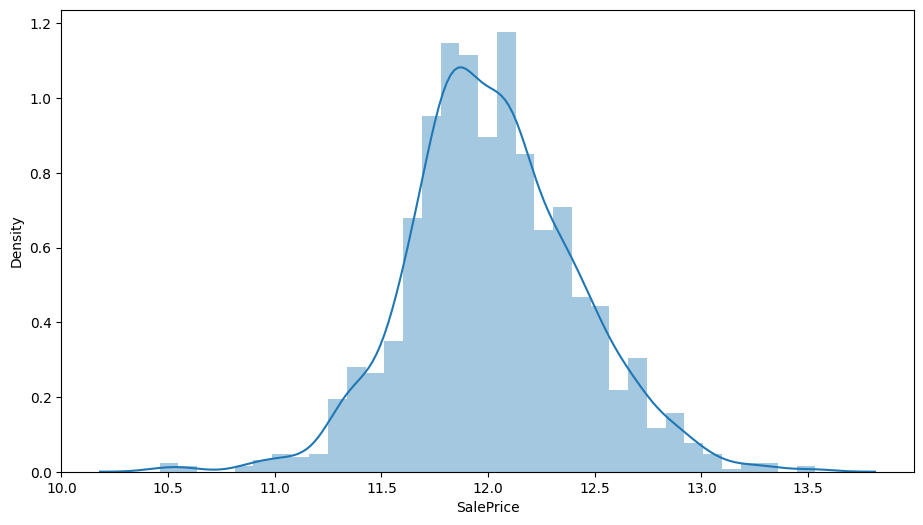

In [866]:
#since the data is skewed and does not follow gaussian curve
plt.figure(figsize=(11,6))
sns.distplot(np.log(housing_df["SalePrice"]))

<Axes: xlabel='SalePrice'>

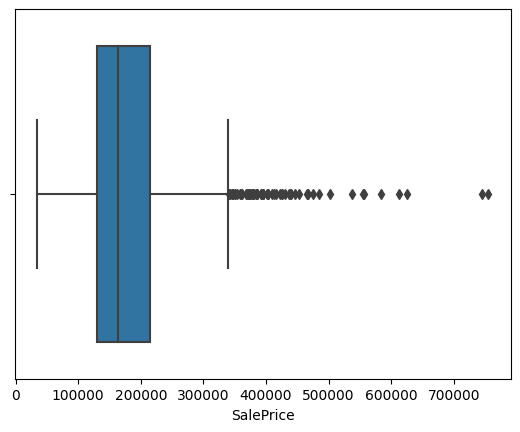

In [867]:
# if we compare it with the total outliers
sns.boxplot(x='SalePrice', data=housing_df)

**As we can see there are some outliers in above graph.**

In [868]:
# go through data description once again
housing_df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1868.739726     1.767123   472.980137    94.244521   
std       0.644666   453.697295     0.747315   213.804841   125.338794   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000  1958.000000     1.000000   334.500000     0.000000   
50%       1.000000  1977.000000     2.000000   480.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch       MoSold       YrSold      SalePrice  
count  1460.000000    1460.000000  1460.000000  1460.000000    1460.000000  
mean     46.660274      21.954110     6.321918  2007.815753  180921.195890  
std      66.256028      61.119149     2.703626     1.328095   79442.502883  
min       0.000000       0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000       0.000000     5.000000  2007.000000  129975.000000  
50%      25.000000       0.000000     6.000000  2008.000000  163000.000000  
75%      68.000000       0.000000     8.000000  2009.000000  214000.000000  
max     547.000000     552.000000    12.000000  2010.000000  755000.000000  

[8 rows x 29 columns]

**We can  see there are numerical as well as categorical variables**

#### Dividing numerical and categorical data

**Univariate analysis of categorical cols**

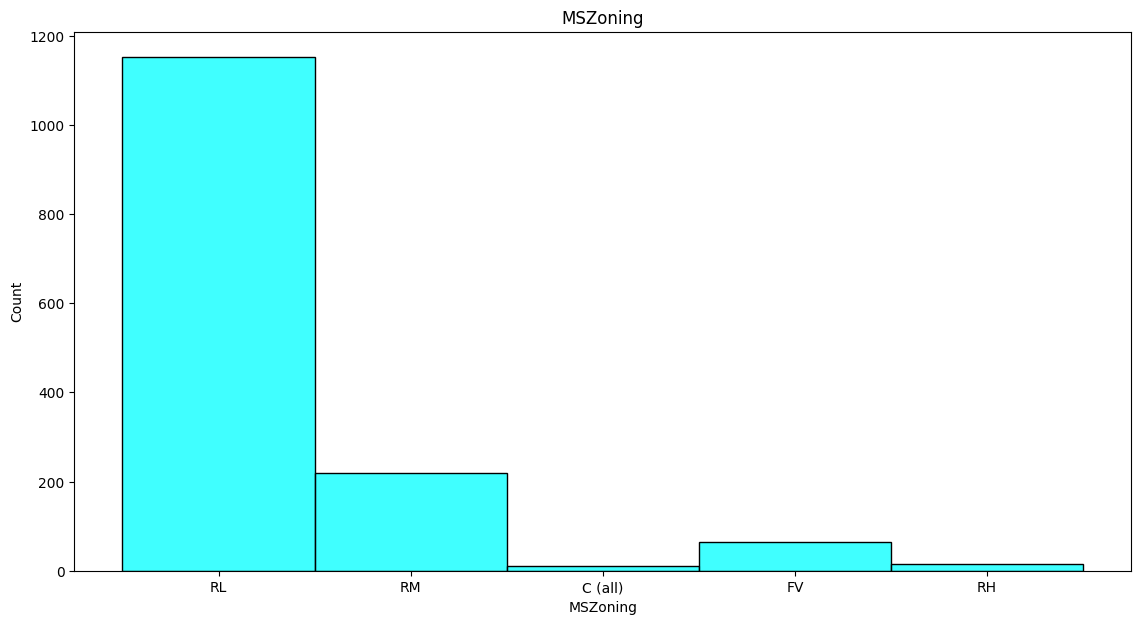

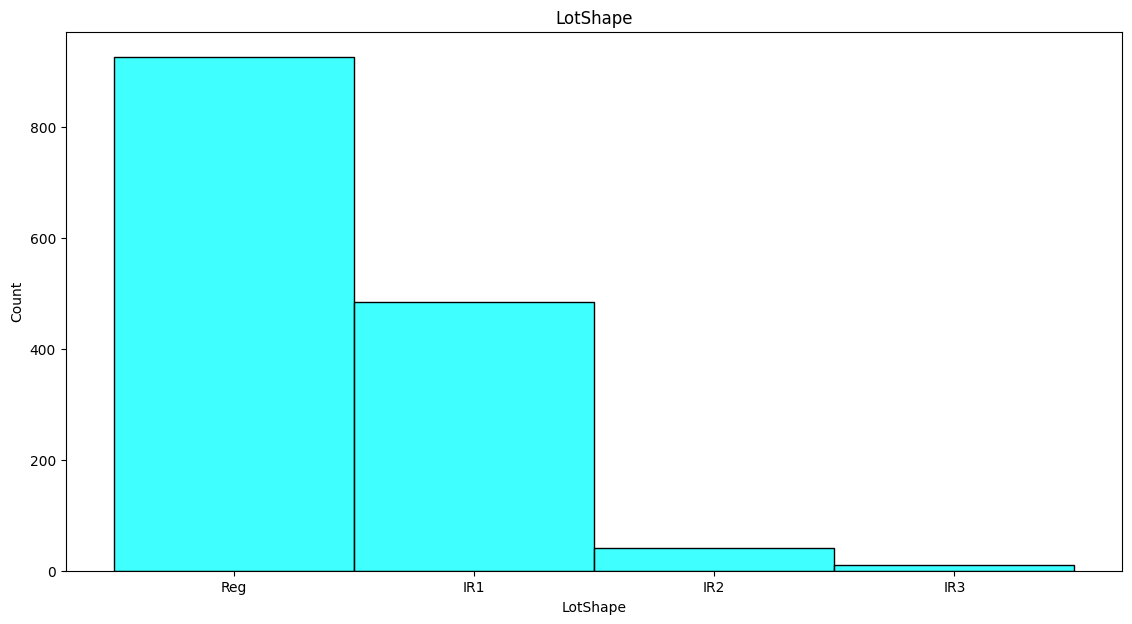

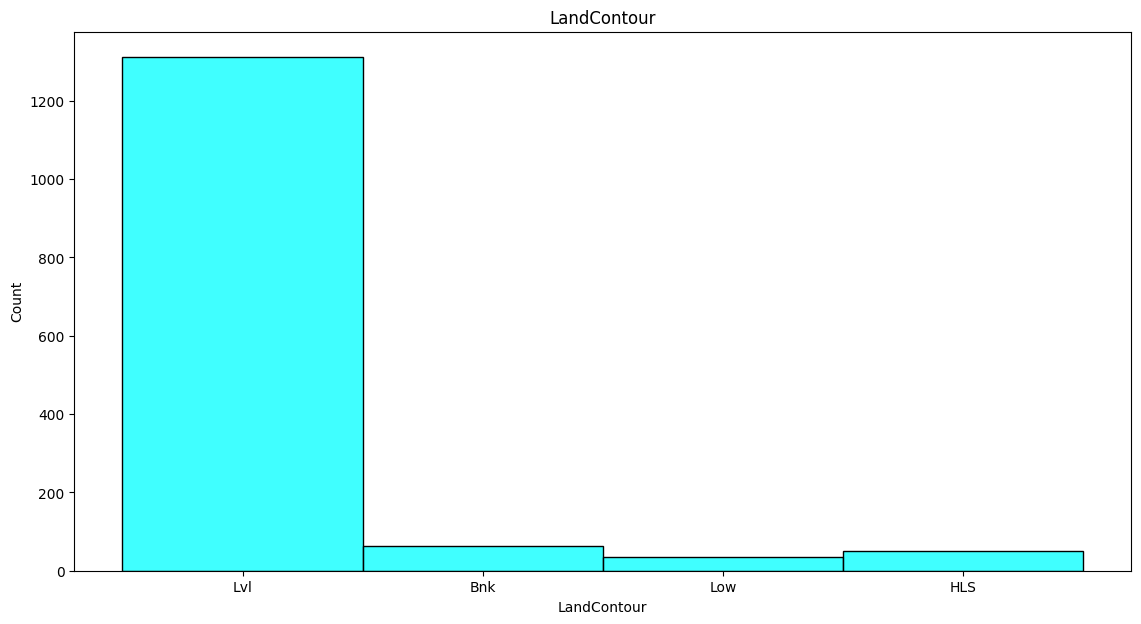

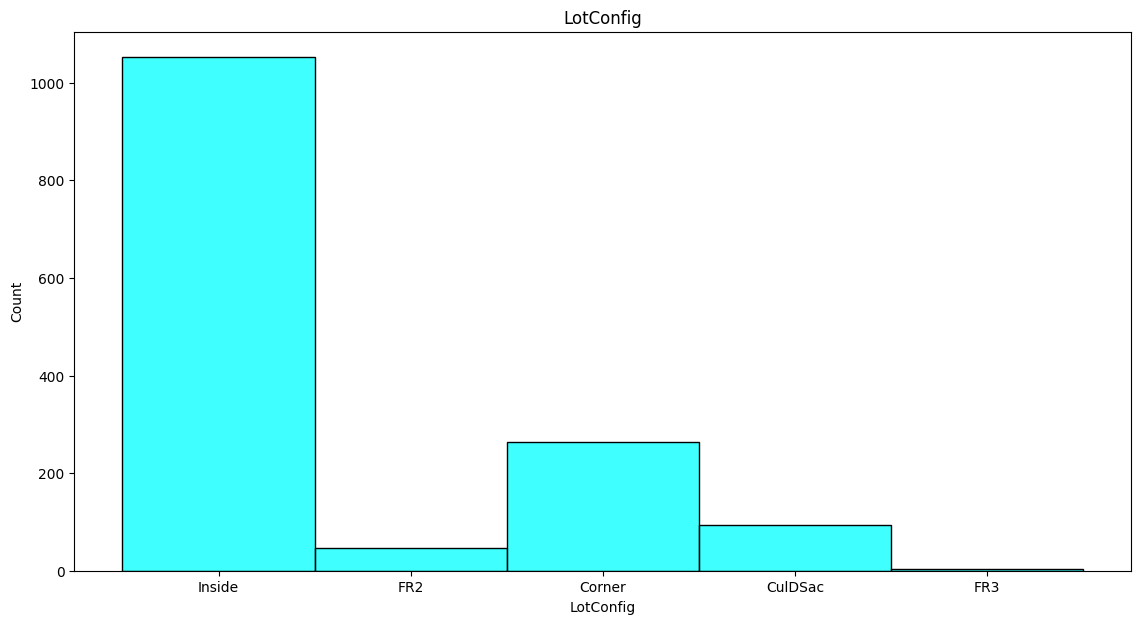

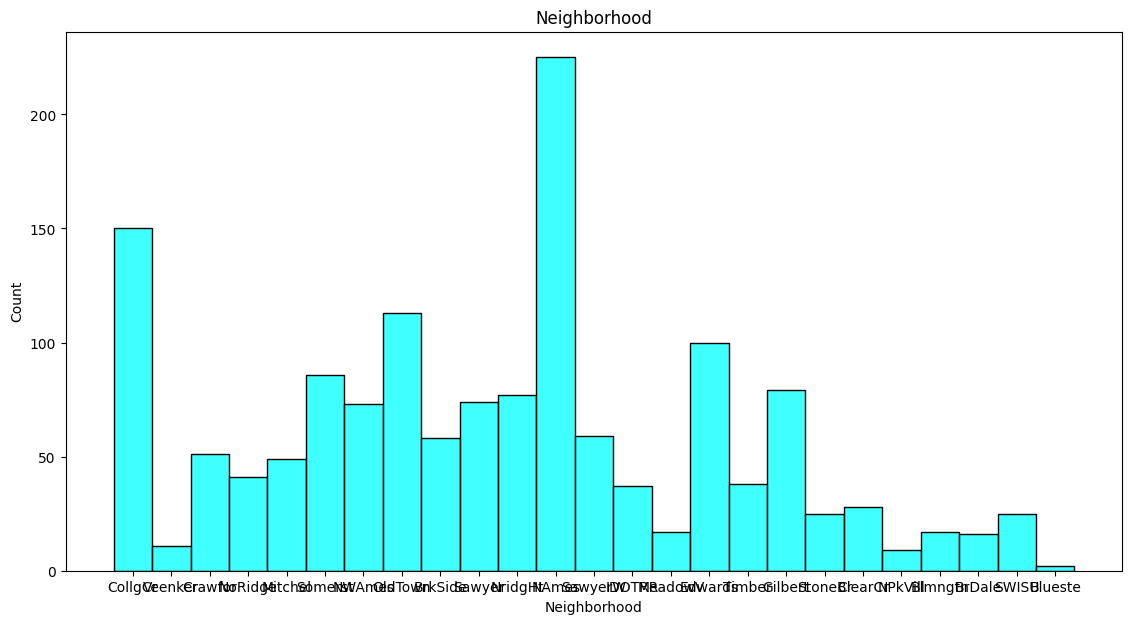

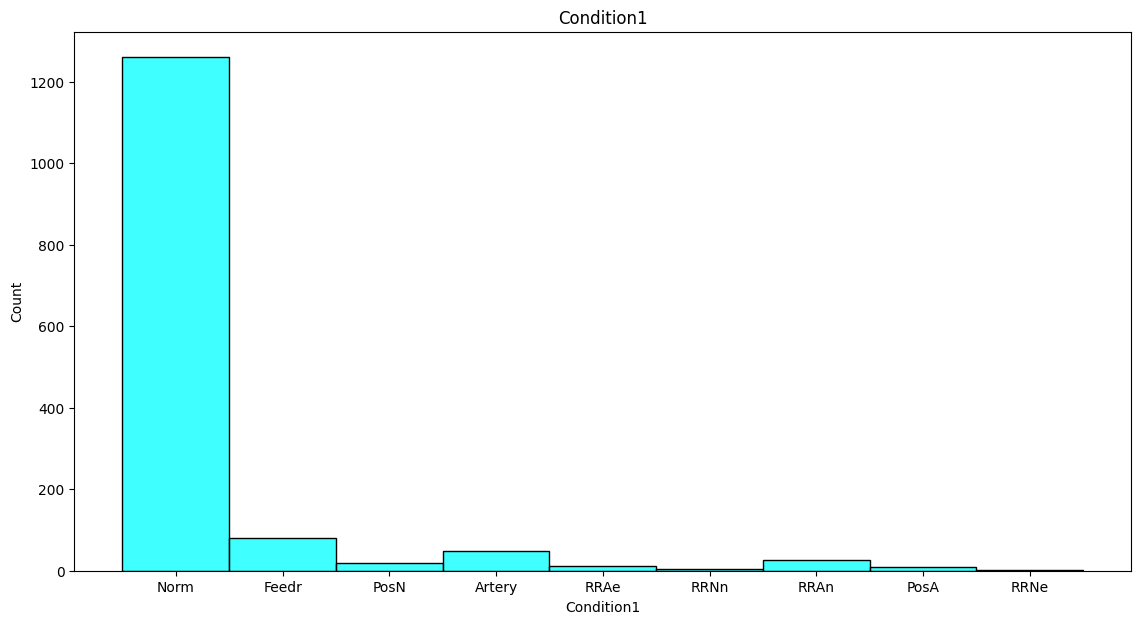

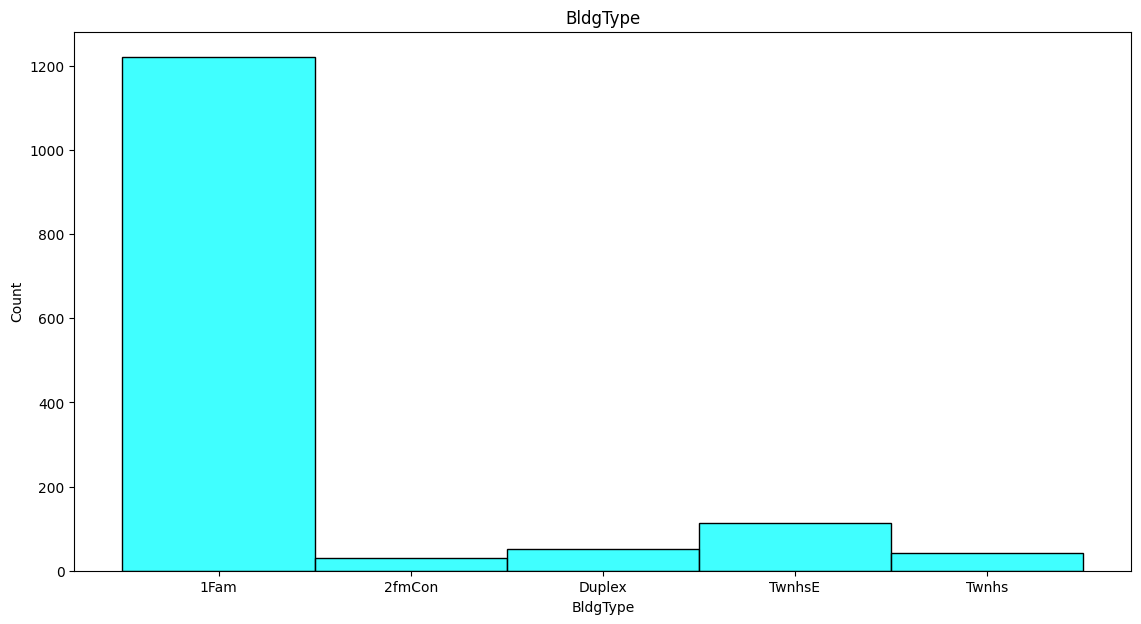

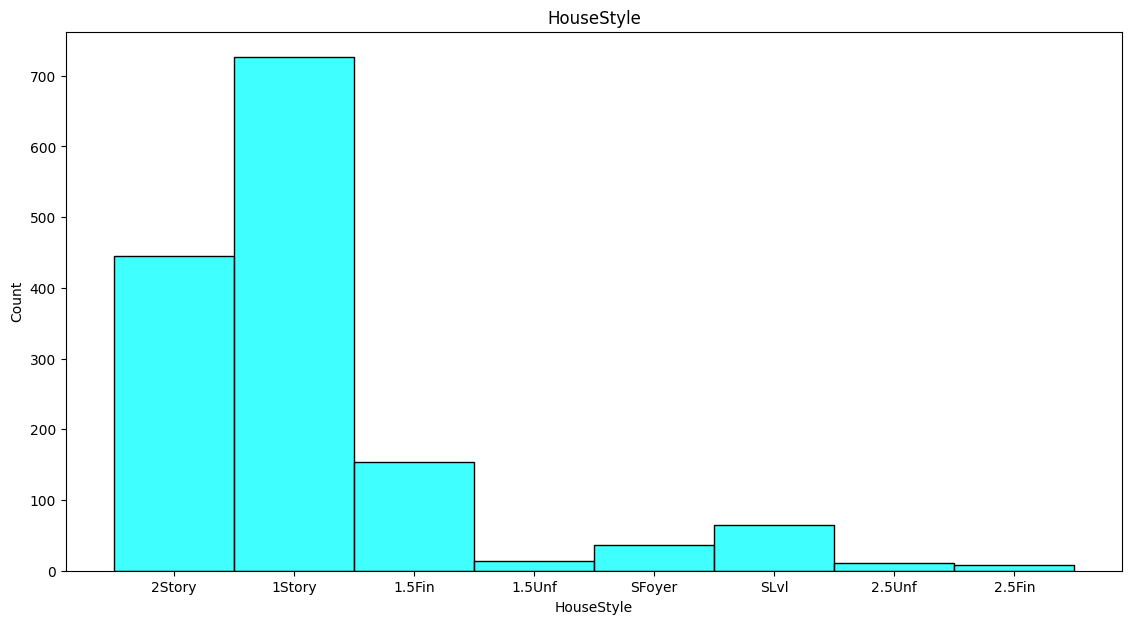

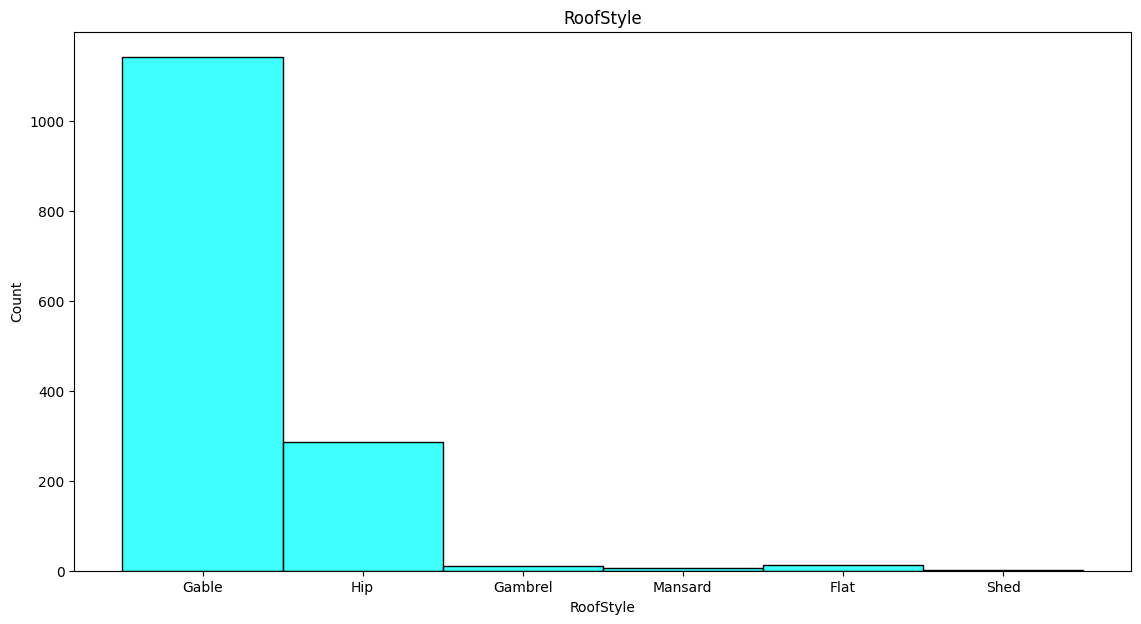

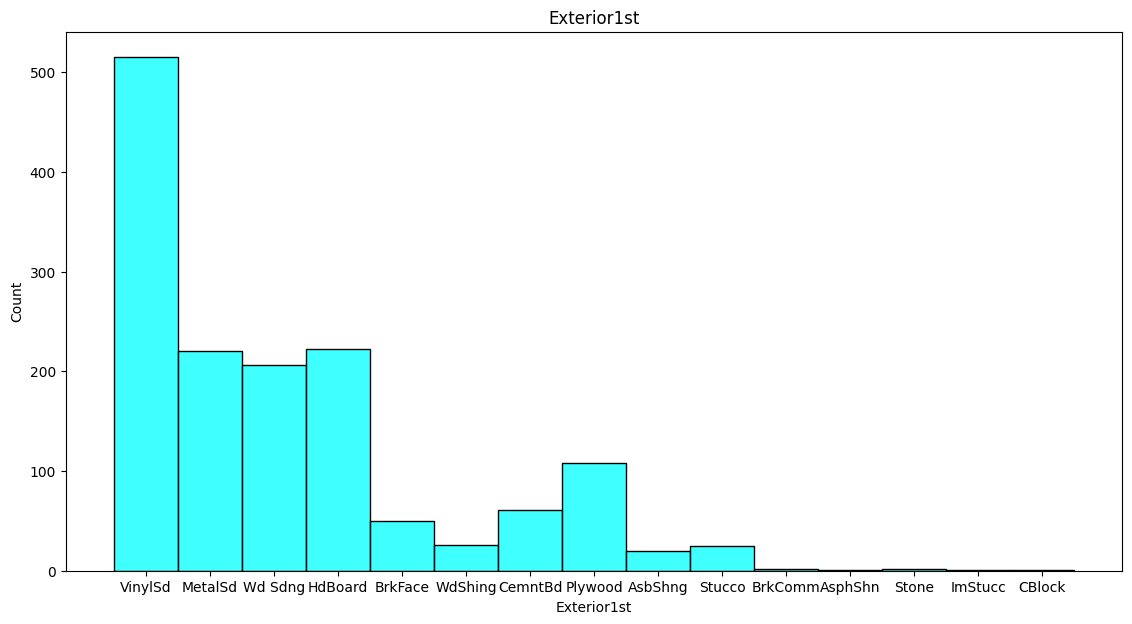

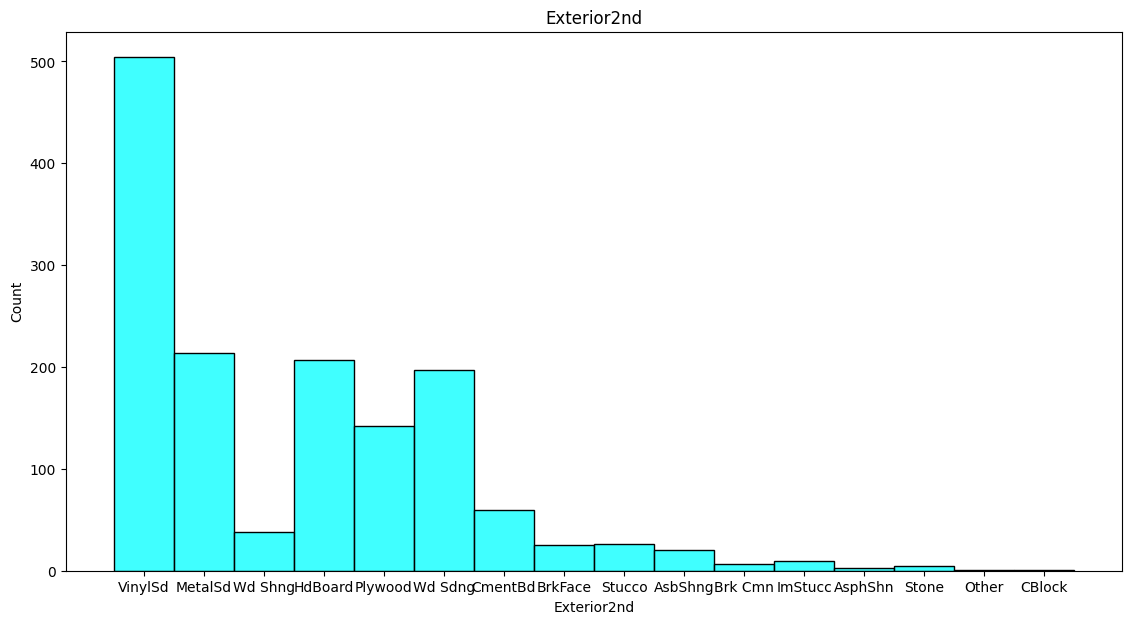

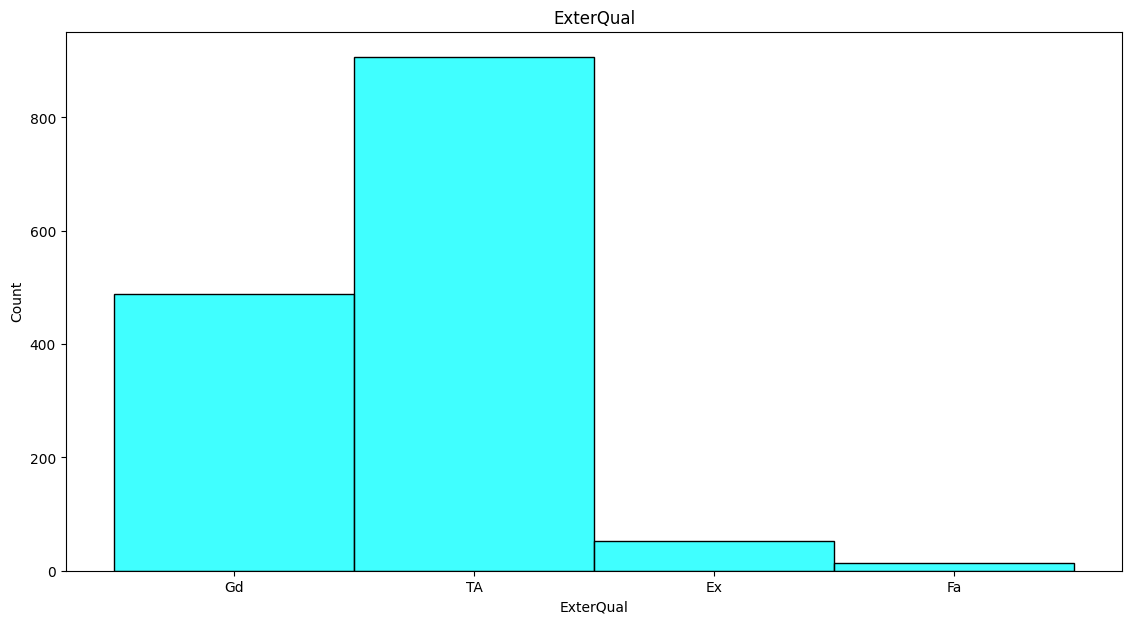

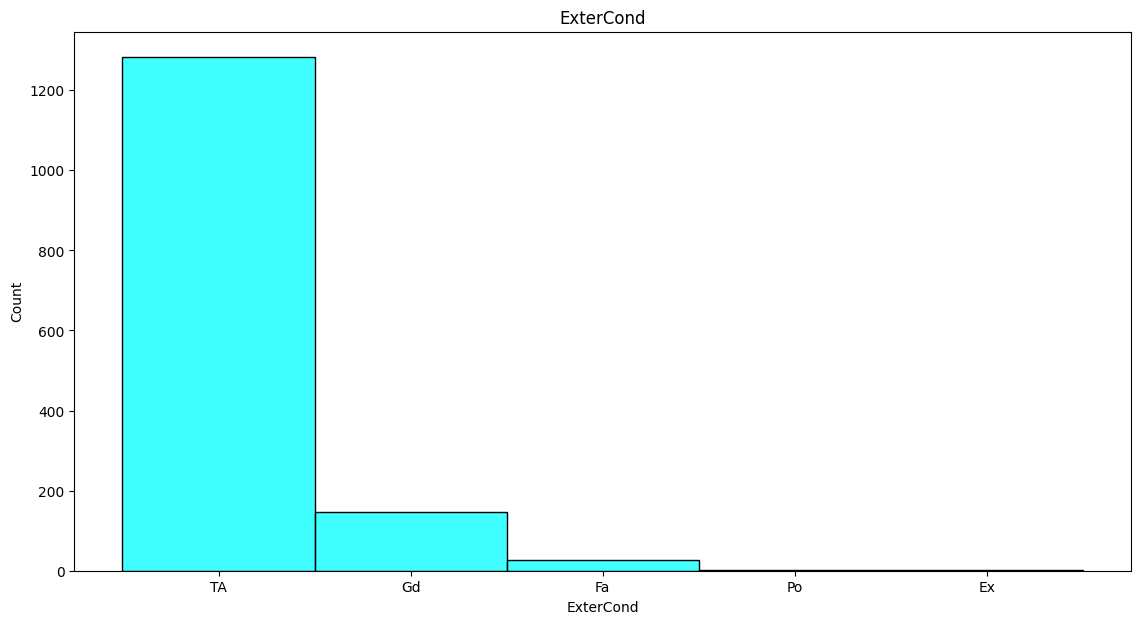

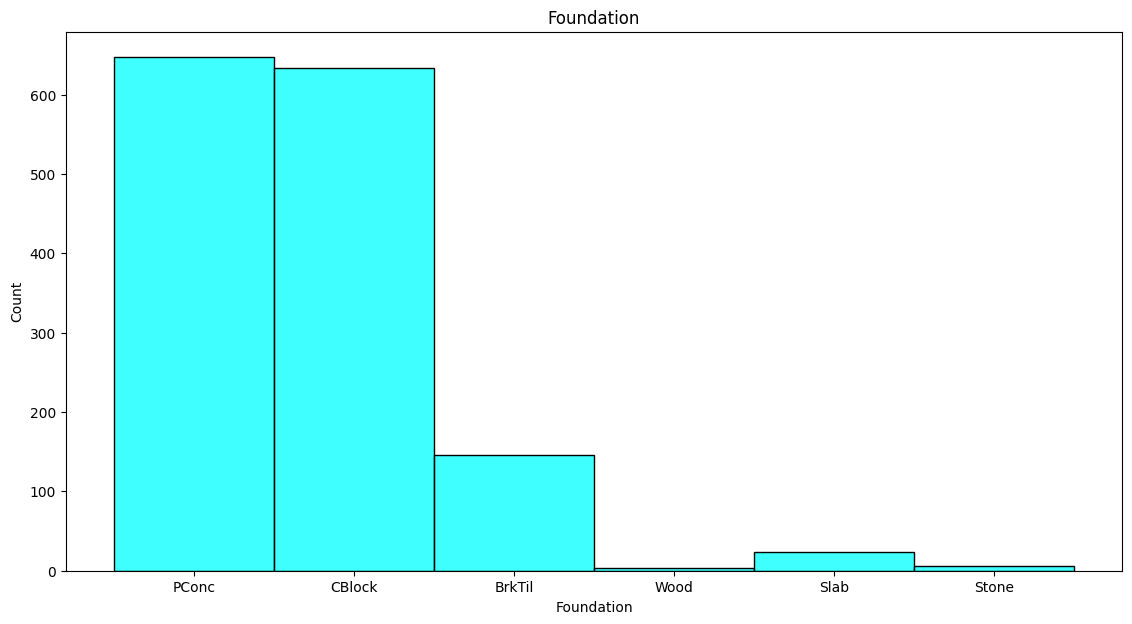

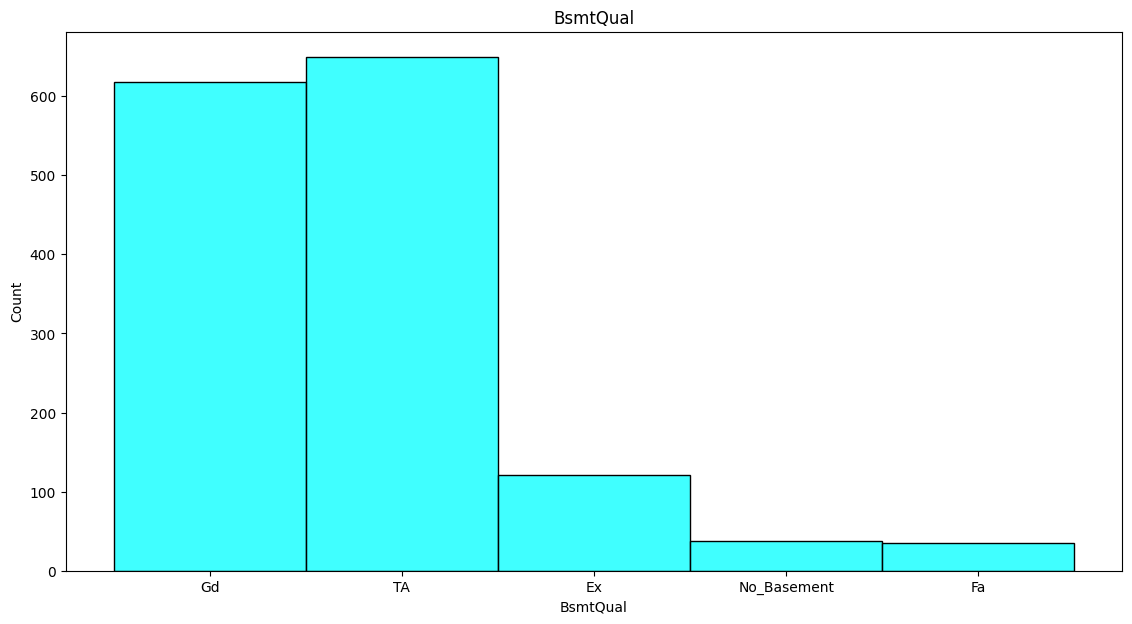

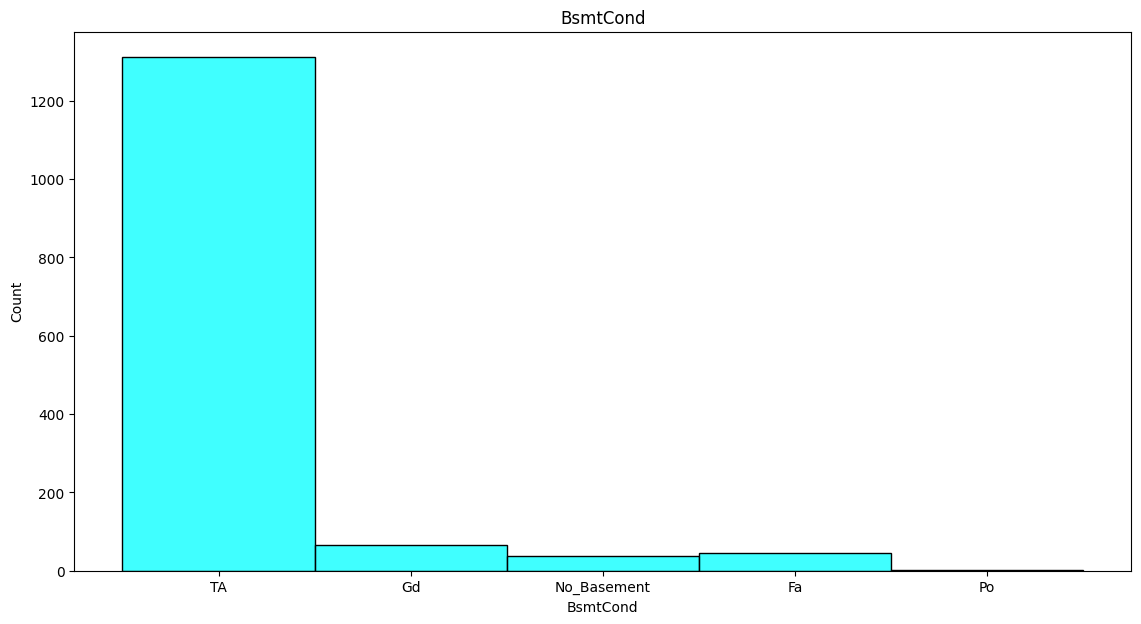

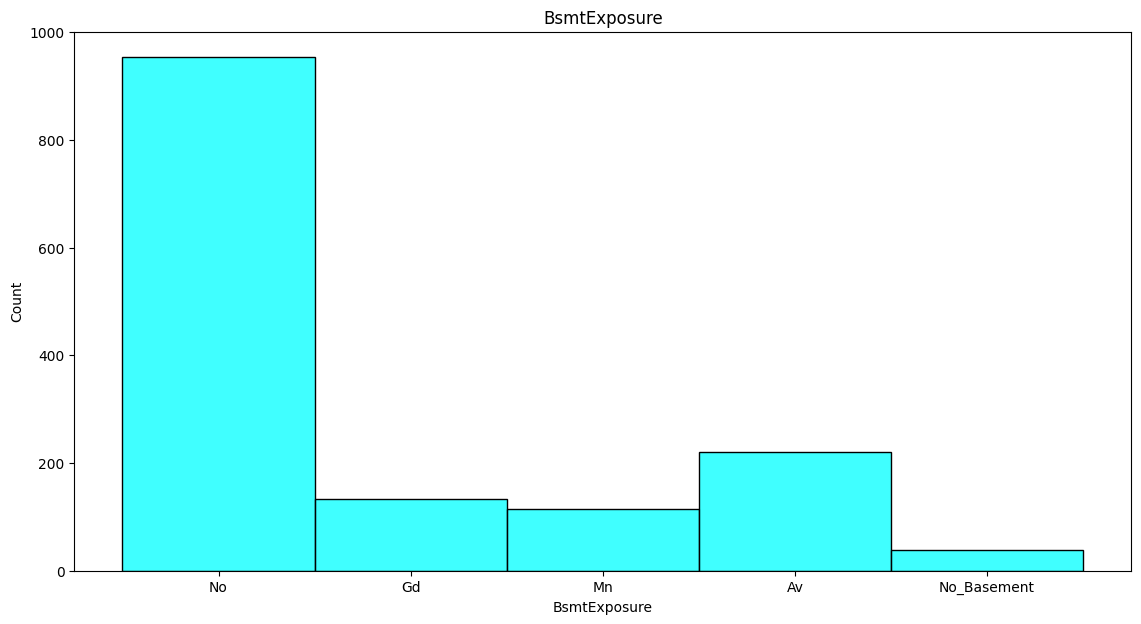

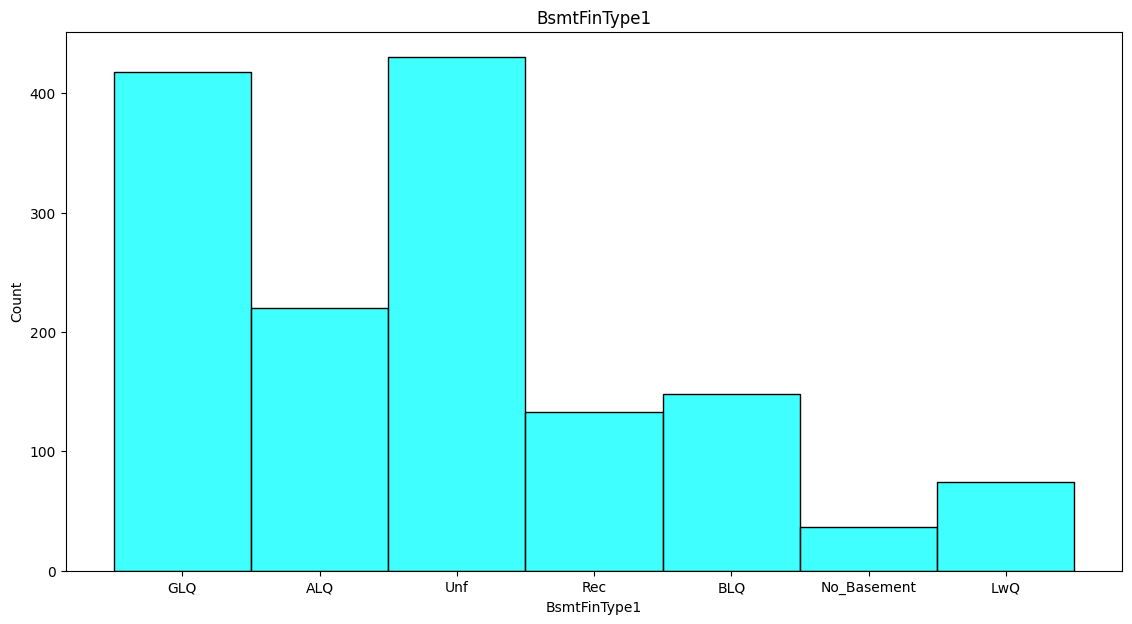

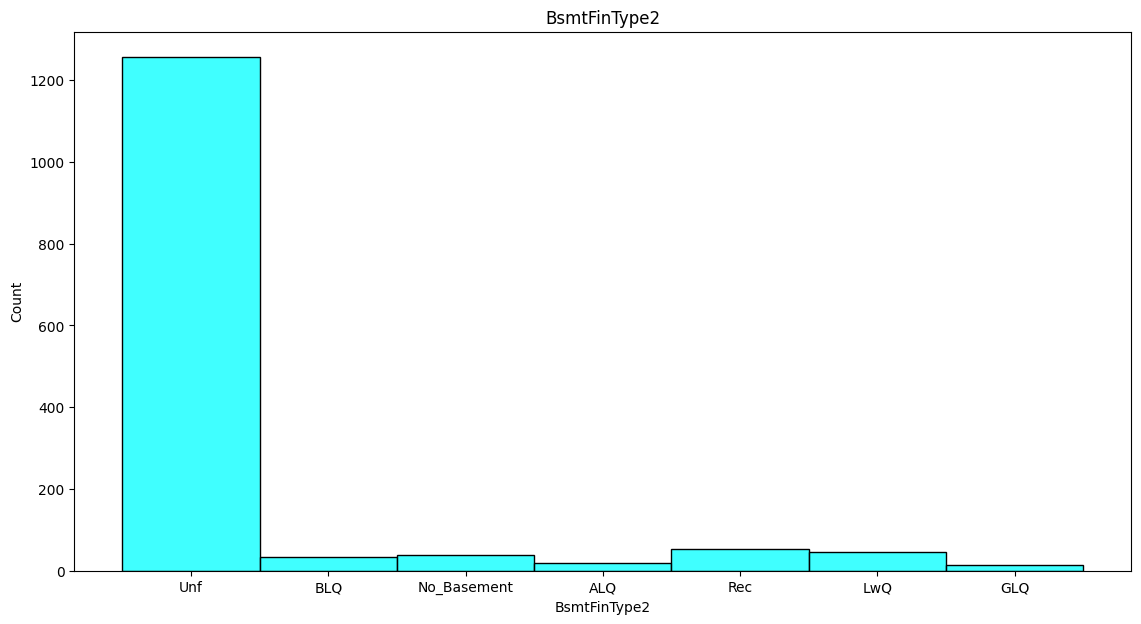

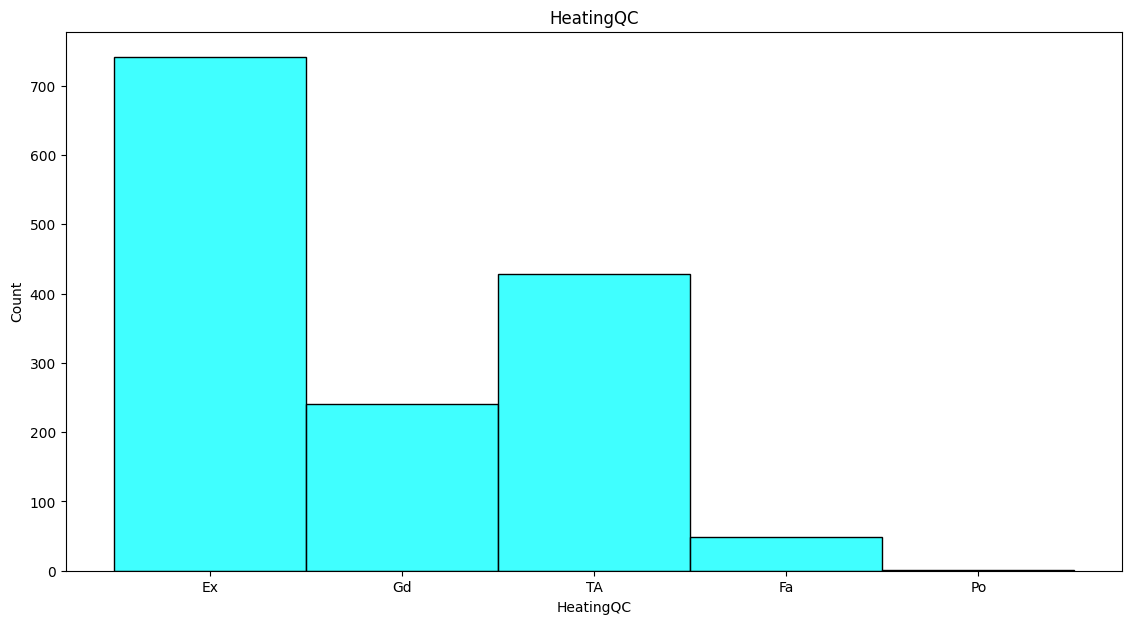

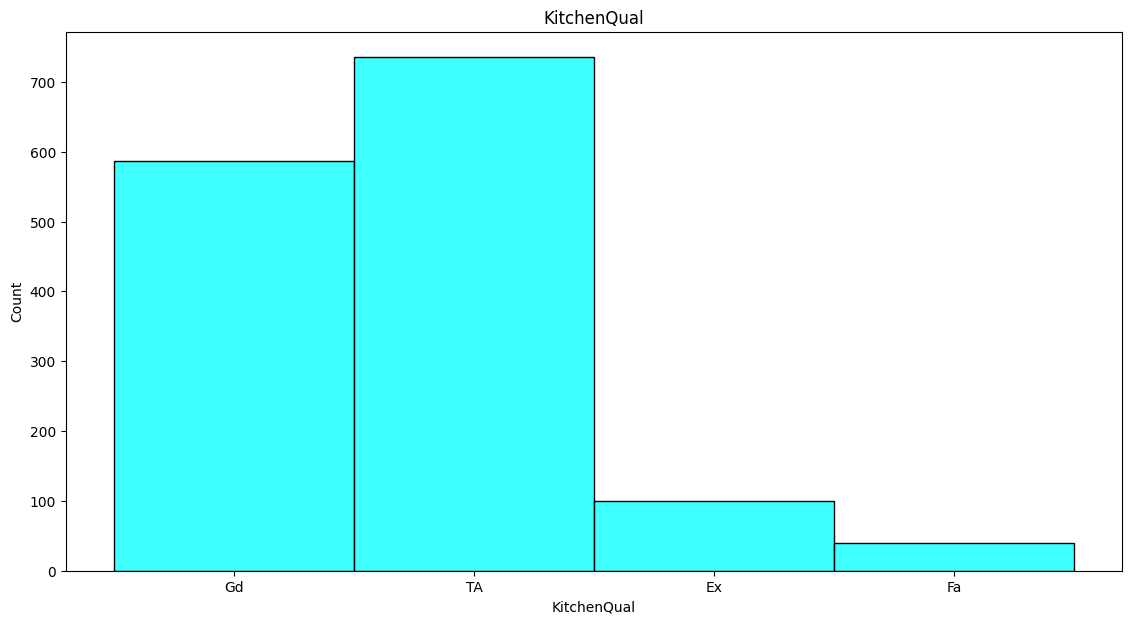

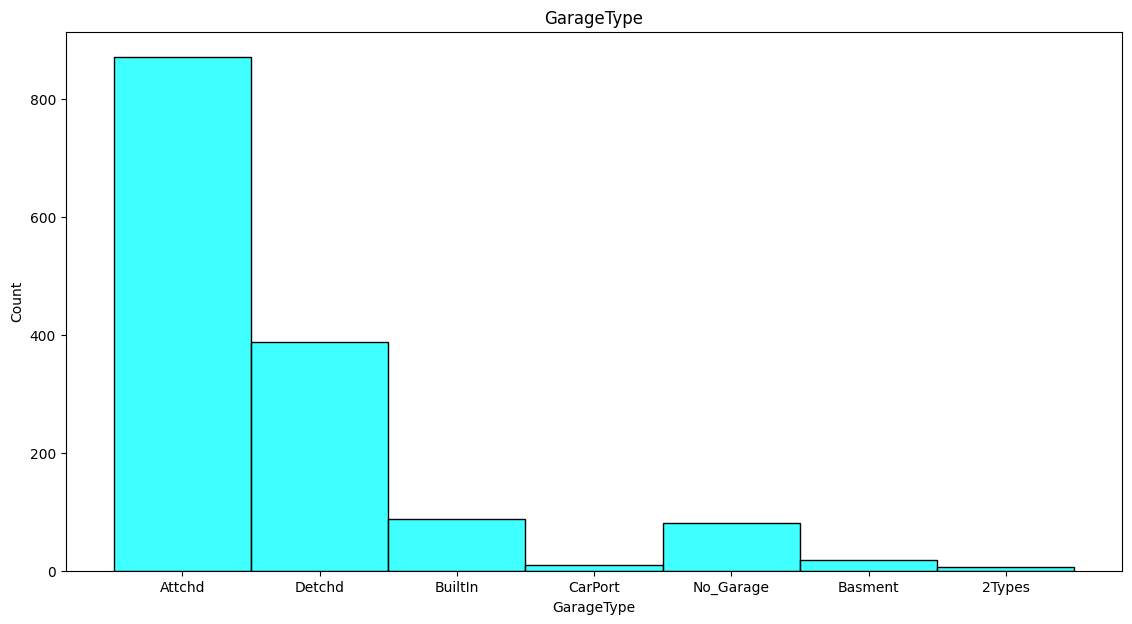

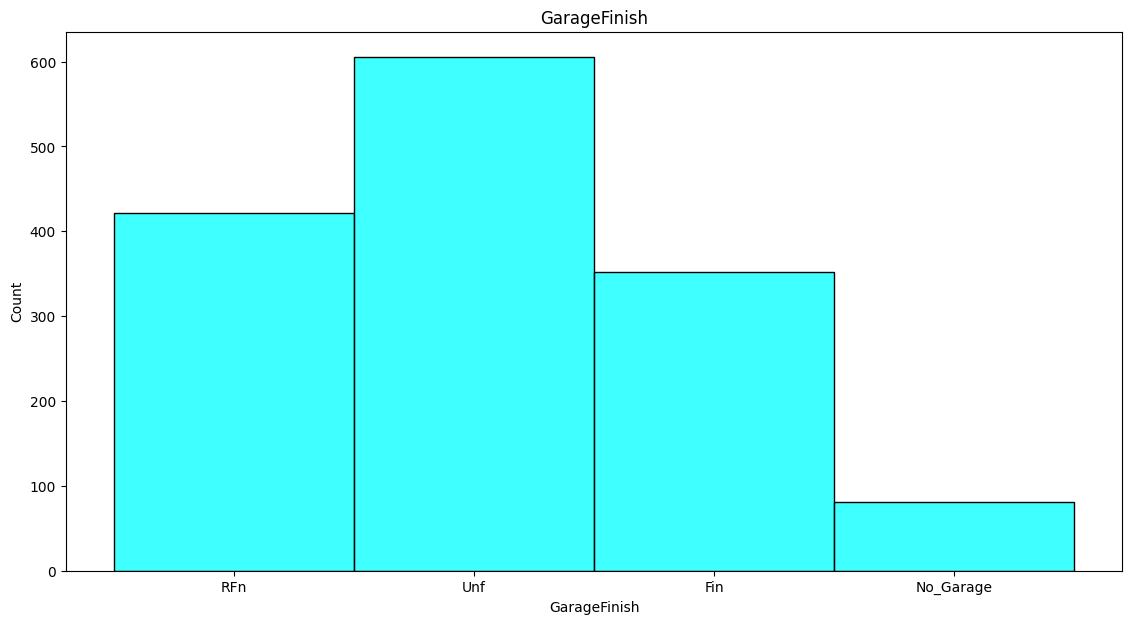

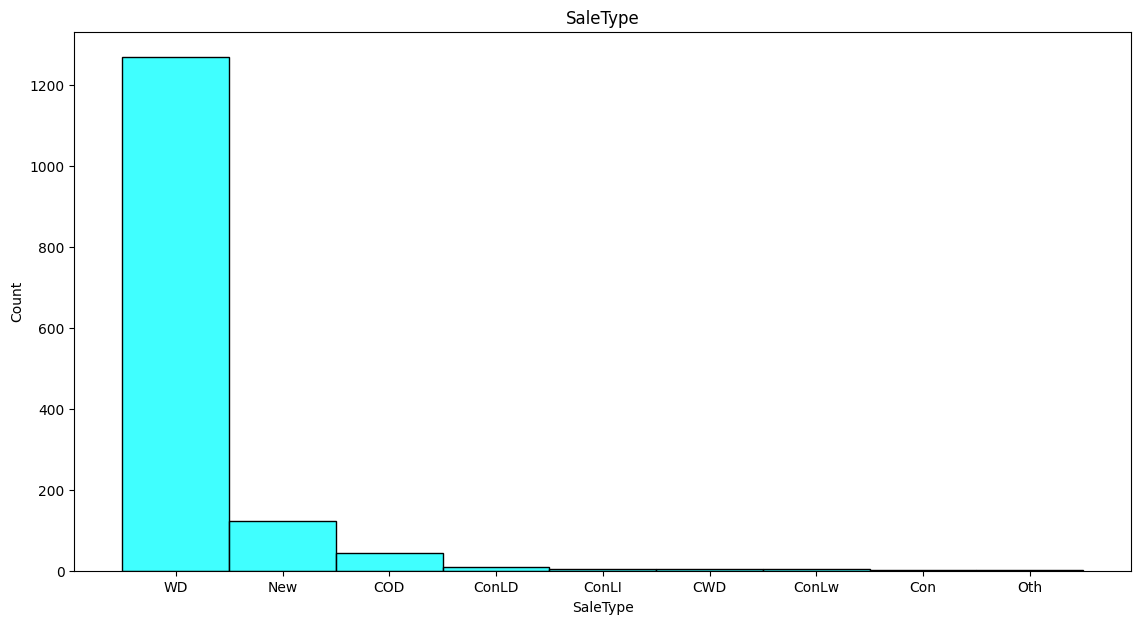

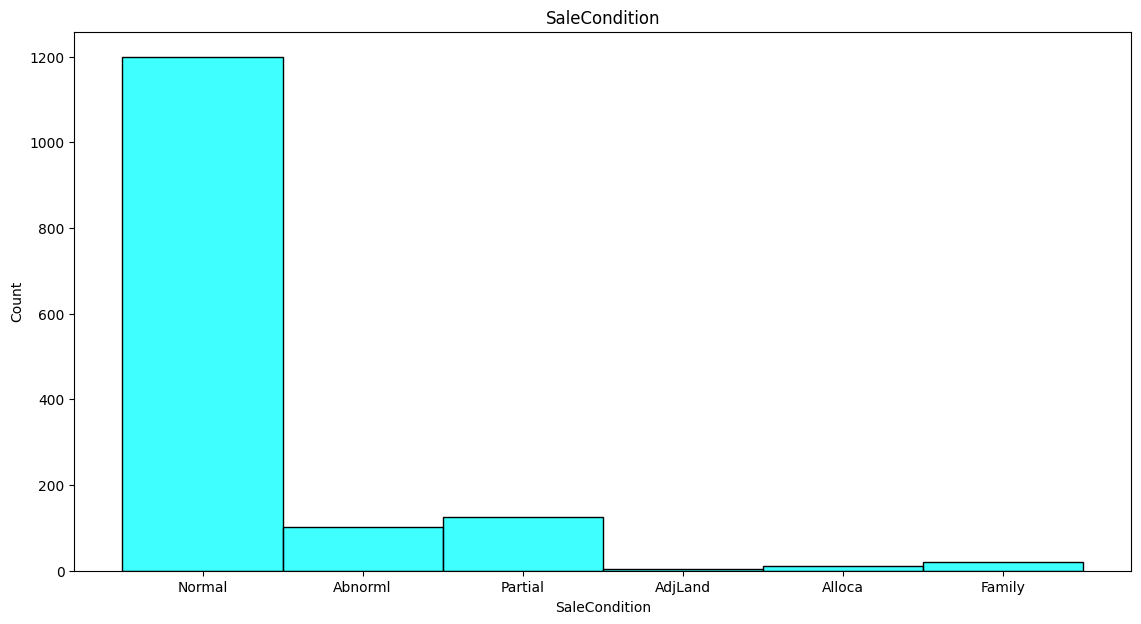

In [869]:
#function to create boxplots for all categorical variables 
categorical_variables = [f for f in housing_df.columns if housing_df.dtypes[f] == 'object']

#univariate analysis
for col in categorical_variables: 
    plt.figure(figsize=(30,7))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 12})
    sns.histplot(housing_df[col], color='cyan')
    plt.show()



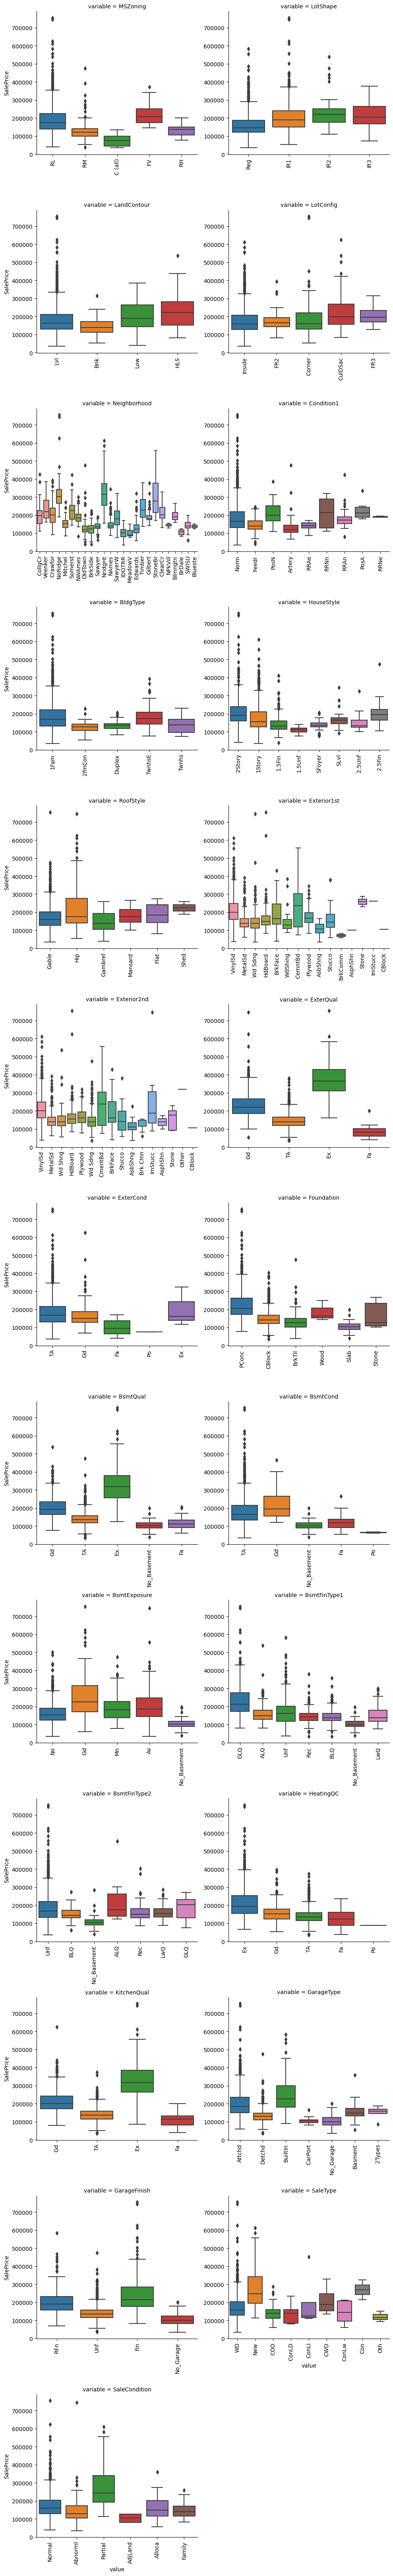

In [870]:
# Bivariate analysis
def plotBoxPlotForCategoricalVariables(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=categorical_variables)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(plotBoxPlotForCategoricalVariables, "value", "SalePrice")

### finding all the numerical values after the updates

In [871]:
numerical_variables = [f for f in housing_df.columns if housing_df.dtypes[f] != 'int64']
numerical_variables

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

**Now let us try to understand how Garage and basement data is analysed against Saleprice**

In [872]:
# basement columns:
house_Basement = housing_df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

<Figure size 2000x1200 with 0 Axes>

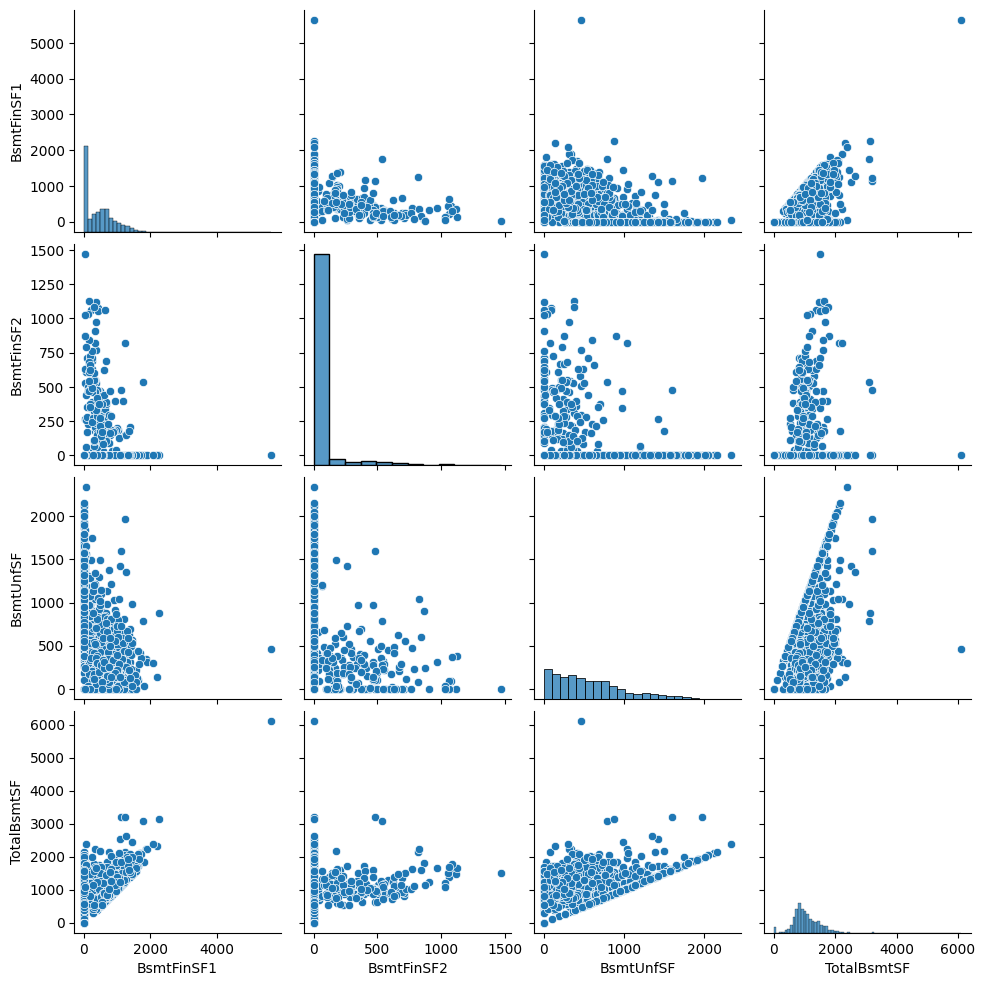

In [873]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

**We can observe from above that BsmtFinSF1 and BsmtFinSF2 can be dropped**

In [874]:
df_num = housing_df.select_dtypes(include=['int64'])
df_num

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd  \
0            706           0        150          856  ...             8   
1            978           0        284         1262  ...             6   
2            486           0        434          920  ...             6   
3            216           0        540          756  ...             7   
4            655           0        490         1145  ...             9   
...          ...         ...        ...          ...  ...           ...   
1455           0           0        953          953  ...             7   
1456         790         163        589         1542  ...             7   
1457         275           0        877         1152  ...             9   
1458          49        1029          0         1078  ...             5   
1459         830         290        136         1256  ...             6   

      Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0              0           2         548           0           61   
1              1           2         460         298            0   
2              1           2         608           0           42   
3              1           3         642           0           35   
4              1           3         836         192           84   
...          ...         ...         ...         ...          ...   
1455           1           2         460           0           40   
1456           2           2         500         349            0   
1457           2           1         252           0           60   
1458           0           1         240         366            0   
1459           0           1         276         736           68   

      EnclosedPorch  MoSold  YrSold  SalePrice  
0                 0       2    2008     208500  
1                 0       5    2007     181500  
2                 0       9    2008     223500  
3               272       2    2006     140000  
4                 0      12    2008     250000  
...             ...     ...     ...        ...  
1455              0       8    2007     175000  
1456              0       2    2010     210000  
1457              0       5    2010     266500  
1458            112       4    2010     142125  
1459              0       6    2008     147500  

[1460 rows x 27 columns]

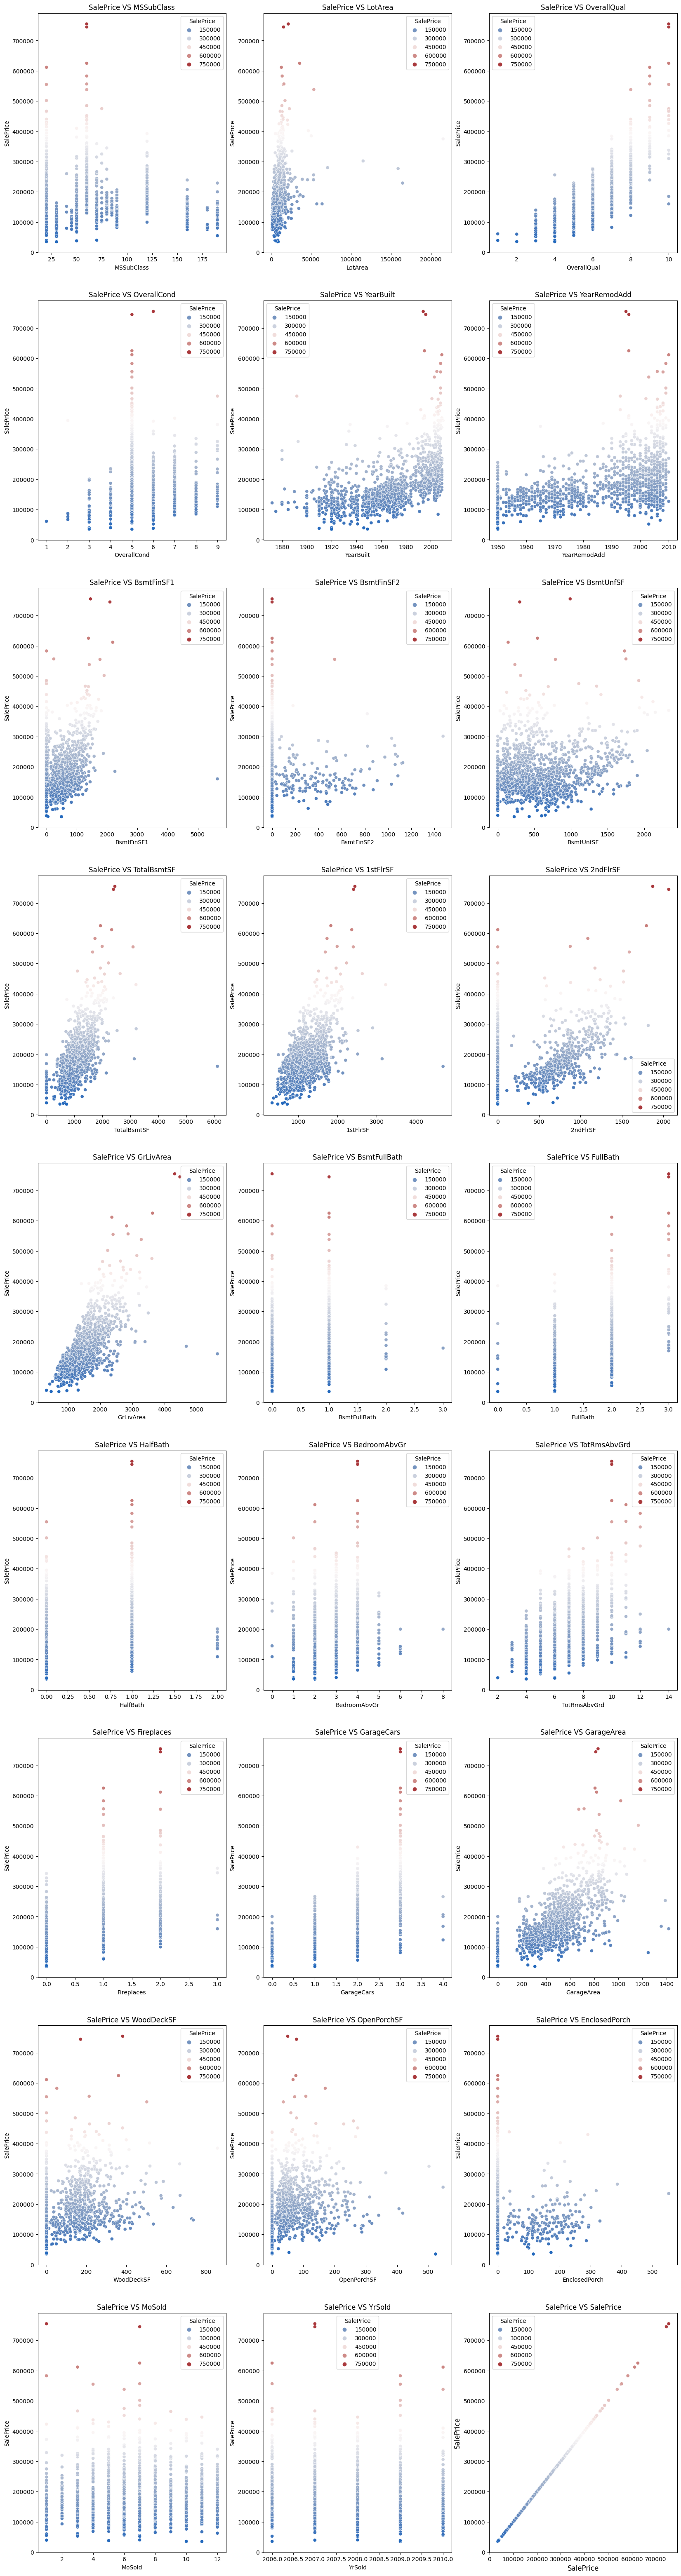

In [875]:
#Visualising numerical predictor variables with Target Variables
df_num = housing_df.select_dtypes(include=['int64'])
fig,axs= plt.subplots(9,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='vlag')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

#### Observations

**1. Salesprice is proportional to Above grade (ground) living area square feet .**


**2. Salesprice has some correlation with total basement area.**


**3. New properties are more expensive then old properties.**

**Let's plot a correlation map to see how correlated all these varialbes are to Salesprice**

In [876]:
# Checking the correlation between the variables
corr_ = df_num.corr()
corr_

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.139781     0.032628    -0.059316   0.027850   
LotArea         -0.139781  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.032628  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.027850  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.040581  0.013788     0.550684     0.073741   0.592855   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2      -0.065649  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF       -0.140759 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF     -0.238518  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF        -0.251758  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF         0.307886  0.050986     0.295493     0.028942   0.010308   
GrLivArea        0.074853  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath     0.003491  0.158155     0.111098    -0.054942   0.187599   
FullBath         0.131608  0.126031     0.550600    -0.194149   0.468271   
HalfBath         0.177354  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr    -0.023438  0.119690     0.101676     0.012980  -0.070651   
TotRmsAbvGrd     0.040380  0.190015     0.427452    -0.057583   0.095589   
Fireplaces      -0.045569  0.271364     0.396765    -0.023820   0.147716   
GarageCars      -0.040110  0.154871     0.600671    -0.185758   0.537850   
GarageArea      -0.098672  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF      -0.012579  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF     -0.006100  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch   -0.012037 -0.018340    -0.113937     0.070356  -0.387268   
MoSold          -0.013585  0.001205     0.070815    -0.003511   0.012398   
YrSold          -0.021407 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice       -0.084284  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass         0.040581   -0.069836   -0.065649  -0.140759    -0.238518   
LotArea            0.013788    0.214103    0.111170  -0.002618     0.260833   
OverallQual        0.550684    0.239666   -0.059119   0.308159     0.537808   
OverallCond        0.073741   -0.046231    0.040229  -0.136841    -0.171098   
YearBuilt          0.592855    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd       1.000000    0.128451   -0.067759   0.181133     0.291066   
BsmtFinSF1         0.128451    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2        -0.067759   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF          0.181133   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF        0.291066    0.522396    0.104810   0.415360     1.000000   
1stFlrSF           0.240379    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF           0.140024   -0.137079   -0.099260   0.004469    -0.174512   
GrLivArea          0.287389    0.208171   -0.009640   0.240257     0.454868   
BsmtFullBath       0.119470    0.649212    0.158678  -0.422900     0.307351   
FullBath           0.439046    0.058543   -0.076444   0.288886     0.323722   
HalfBath           0.183331    0.004262   -0.032148  -0.041118    -0.048804   
BedroomAbvGr      -0.040581   -0.107355   -0.015728   0.166643     0.050450   
TotRmsAbvGrd       0.191740    0.044316   -0.035227   0.250647     0.285573   
Fireplaces         0.112581    0.260011    0.046921   0.051575     0.339519   
GarageCars         0.420622    0.224054   -0.038264   0.214175     0.434585   
GarageArea         0.371600    0.296970   -0.018227   0.183303     0.486665   
WoodDeckSF         0.205726    0.204306    0.067898  -0.005316     0.232019   
OpenPorchSF        0.226298    0.111761    0.003093   0.129005     0.

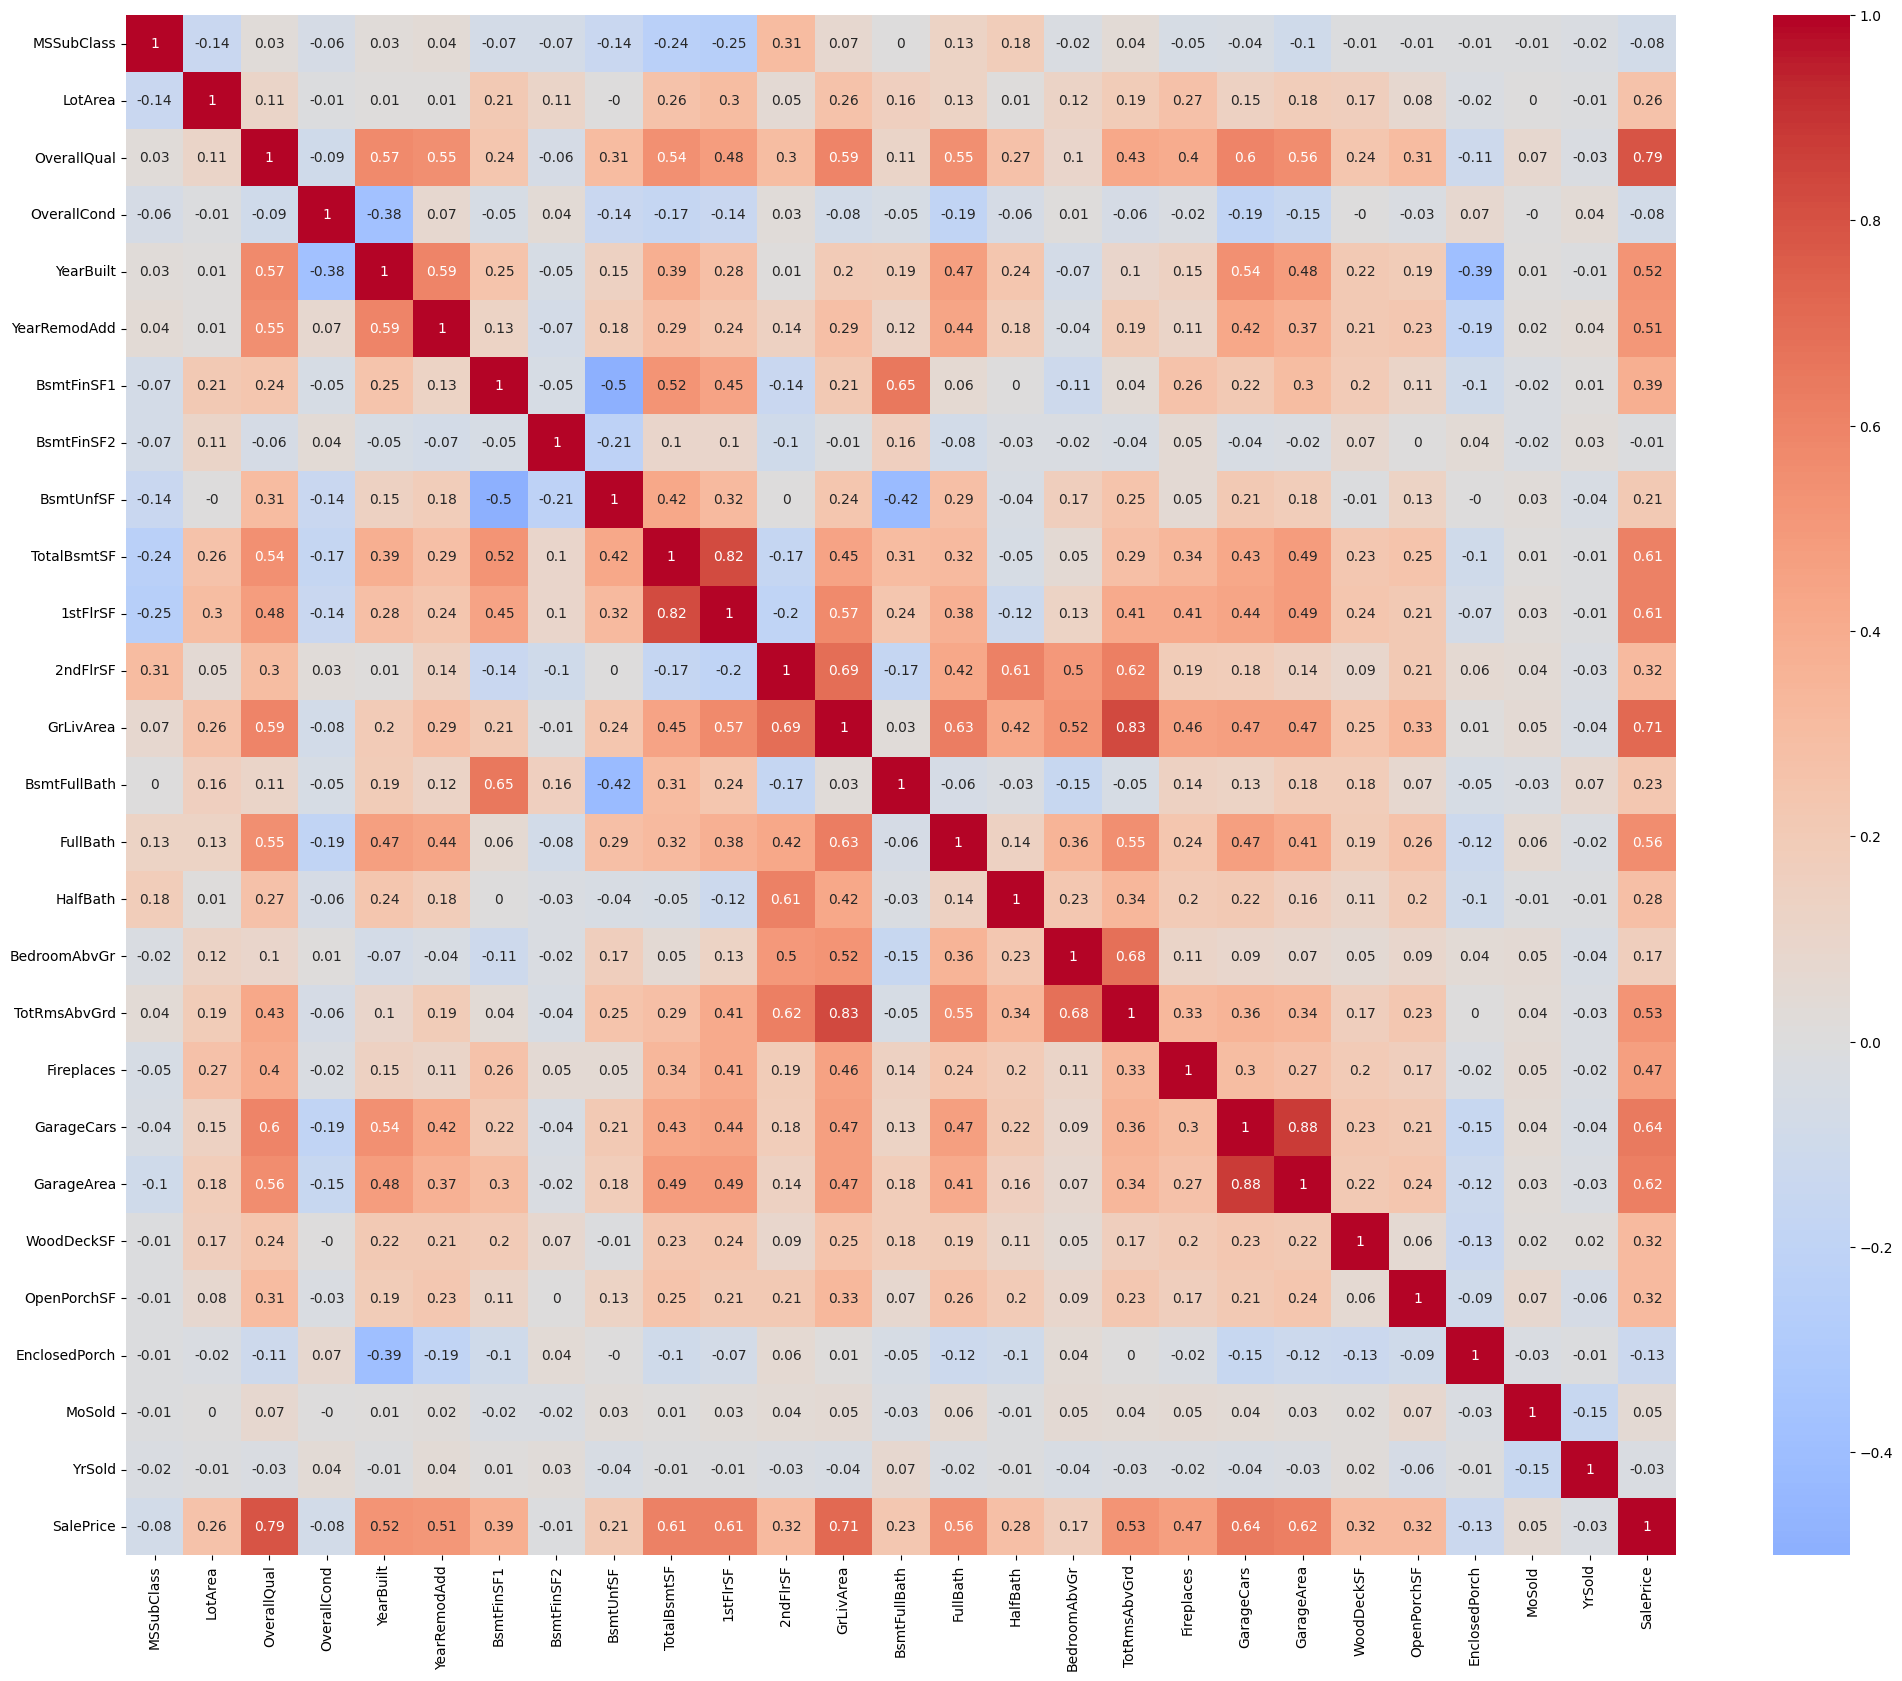

In [877]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

**From the correlation heatmap given above we can see that some of the numerical colums are highly co-related with the sales price**

- Overall Quality
- Age
- TotalBsmntSF
- 1st Floor SF
- GrLivArea
- Fullbath
- Fireplaces
- Garage Area



**Let's drop the highly correlated features.**

In [878]:
housing_df.drop(['OverallQual','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','GarageCars'],
         axis=1,inplace=True)

**We have some categorical data that is showing up in numerical . Le's prepare the data to handle these.**

## 4. Data Preparation

### 4.1 Preparation of new columns

**There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built**

In [879]:
housing_df['Age']=housing_df['YrSold']-housing_df['YearRemodAdd']
housing_df['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [880]:
housing_df=housing_df.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [881]:
# find all categorical variables
print(categorical_variables)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


In [882]:
housing_df[categorical_variables]

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0          RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1          RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2          RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3          RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4          RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   
...       ...      ...         ...       ...          ...        ...      ...   
1455       RL      Reg         Lvl    Inside      Gilbert       Norm     1Fam   
1456       RL      Reg         Lvl    Inside       NWAmes       Norm     1Fam   
1457       RL      Reg         Lvl    Inside      Crawfor       Norm     1Fam   
1458       RL      Reg         Lvl    Inside        NAmes       Norm     1Fam   
1459       RL      Reg         Lvl    Inside      Edwards       Norm     1Fam   

     HouseStyle RoofStyle Exterior1st  ... BsmtCond BsmtExposure BsmtFinType1  \
0        2Story     Gable     VinylSd  ...       TA           No          GLQ   
1        1Story     Gable     MetalSd  ...       TA           Gd          ALQ   
2        2Story     Gable     VinylSd  ...       TA           Mn          GLQ   
3        2Story     Gable     Wd Sdng  ...       Gd           No          ALQ   
4        2Story     Gable     VinylSd  ...       TA           Av          GLQ   
...         ...       ...         ...  ...      ...          ...          ...   
1455     2Story     Gable     VinylSd  ...       TA           No          Unf   
1456     1Story     Gable     Plywood  ...       TA           No          ALQ   
1457     2Story     Gable     CemntBd  ...       Gd           No          GLQ   
1458     1Story       Hip     MetalSd  ...       TA           Mn          GLQ   
1459     1Story     Gable     HdBoard  ...       TA           No          BLQ   

     BsmtFinType2 HeatingQC KitchenQual GarageType GarageFinish SaleType  \
0             Unf        Ex          Gd     Attchd          RFn       WD   
1             Unf        Ex          TA     Attchd          RFn       WD   
2             Unf        Ex          Gd     Attchd          RFn       WD   
3             Unf        Gd          Gd     Detchd          Unf       WD   
4             Unf        Ex          Gd     Attchd          RFn       WD   
...           ...       ...         ...        ...          ...      ...   
1455          Unf        Ex          TA     Attchd          RFn       WD   
1456          Rec        TA          TA     Attchd          Unf       WD   
1457          Unf        Ex          Gd     Attchd          RFn       WD   
1458          Rec        Gd          Gd     Attchd          Unf       WD   
1459          LwQ        Gd          TA     Attchd          Fin       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 25 columns]

### 4.2 Dummy variable creation

In [883]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in housing_df.columns:
    if housing_df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
dummy_df= pd.get_dummies(housing_df[cat_col])   
housing_df=pd.concat([housing_df,dummy_df],axis=1)
housing_df= housing_df.drop(cat_col,axis=1) 

In [884]:
housing_df = housing_df.replace([True, False], [1, 0])

In [885]:
housing_df

MSSubClass  LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0             60     8450            5       196.0         706           0   
1             20     9600            8         0.0         978           0   
2             60    11250            5       162.0         486           0   
3             70     9550            5         0.0         216           0   
4             60    14260            5       350.0         655           0   
...          ...      ...          ...         ...         ...         ...   
1455          60     7917            5         0.0           0           0   
1456          20    13175            6       119.0         790         163   
1457          70     9042            9         0.0         275           0   
1458          20     9717            6         0.0          49        1029   
1459          20     9937            6         0.0         830         290   

      BsmtUnfSF  BsmtFullBath  HalfBath  BedroomAbvGr  ...  SaleType_ConLw  \
0           150             1         1             3  ...               0   
1           284             0         0             3  ...               0   
2           434             1         1             3  ...               0   
3           540             1         0             3  ...               0   
4           490             1         1             4  ...               0   
...         ...           ...       ...           ...  ...             ...   
1455        953             0         1             3  ...               0   
1456        589             1         0             3  ...               0   
1457        877             0         0             4  ...               0   
1458          0             1         0             2  ...               0   
1459        136             1         1             3  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
14

In [886]:
housing_df.shape

(1460, 200)

## 5. Data Modelling

### 5.1 Removal of outlier 

In [887]:
# numerical variables are updated
numerical_variables = [f for f in housing_df.columns if housing_df.dtypes[f] == 'int64']
numerical_variables

['MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'Age',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_Nridg

In [888]:
#Drop records with outliers present lower quantile is .25, upper quantile is .99
def remove_outliers(df=housing_df):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_variables:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [889]:
housing_df = remove_outliers(housing_df)
housing_df.shape

(1240, 200)

<Axes: xlabel='SalePrice'>

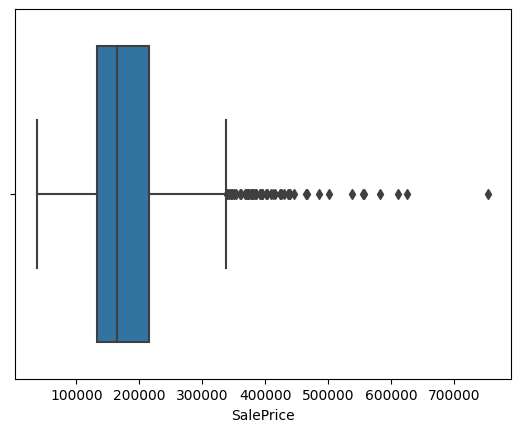

In [890]:
# if we compare it with the total outliers
sns.boxplot(x='SalePrice', data=housing_df)

**If we plot the salesprice values , they will be skewed and will not follow gaussian curve**

<Axes: xlabel='SalePrice', ylabel='Density'>

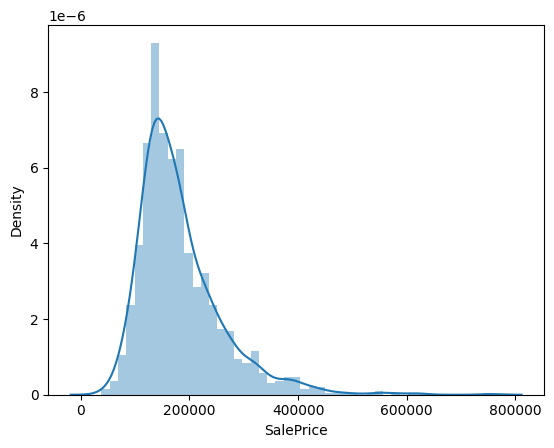

In [891]:
sns.distplot(housing_df['SalePrice'])

**We will transform this data in train and test split**

### 5.2 Splitting into Test and Train set

In [892]:
# removing SalesPrice
y = housing_df.pop('SalePrice')
X = housing_df

In [893]:
# Scaling the values
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [894]:
# Generating a 70:30 split using train_test_split taking random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

**We had observed that y-data was skewed and not following Gaussian. We can tranform this data before creating our model**

In [895]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

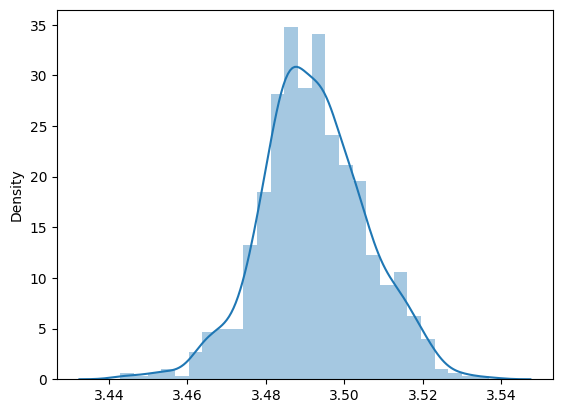

In [896]:
sns.distplot(y_train)
plt.show()

## 6. Model Building

**We observed in exploratory data analysis that a lot of variables share linear relation with salesprices. Hence it is apt to try Linear regression.**

### 6.1 Building a linear regression model(also using RFE)

In [897]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [898]:
# predicting on the train set
y_train_pred = lr.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred)

0.9209208269032864

In [899]:
# predicting on the test set
y_test_pred = lr.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred)

0.8385745084639643

### **Observations**

#### *There is a lot of difference between R-squared value for test and R-squared value for training i.e , the model is overfitting for the training data*

In [900]:
# checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

[3.40137162]


[(array([-1.58528857e-05,  9.95005476e-08,  1.41916812e-03,  1.81316338e-06,
          1.07184773e-05,  1.14929191e-05,  8.96674602e-06,  2.10187544e-04,
          1.03959872e-03,  8.20036843e-04,  8.63614585e-04,  1.59420216e-03,
          3.71156833e-05,  9.72726504e-06,  2.69370895e-06,  9.06747279e-06,
          6.91890886e-07, -4.14387224e-05,  4.51938834e-15,  1.84162995e-03,
          1.60722301e-03, -1.23499672e-03, -2.21385624e-03, -3.39017171e-04,
          4.86804095e-05, -7.55905755e-16,  2.90336761e-04, -1.04649154e-04,
          3.85095110e-05,  6.62477104e-04, -5.96337461e-04,  5.09014271e-04,
          1.50053115e-03, -1.75152854e-03,  2.76471554e-16, -2.58016878e-04,
          2.37204768e-03,  3.24393290e-16, -2.76789231e-03, -1.13458902e-03,
          1.69447813e-03,  5.44323727e-05,  6.22184419e-03, -3.17262936e-03,
          6.34217709e-04, -2.30084699e-03, -9.27721230e-03, -6.60692463e-04,
         -6.08948283e-04, -8.84708973e-17,  4.09776156e-04,  3.14347339e-03,

In [901]:
# creating a model using RFE   
rfe = RFE(lr,n_features_to_select=105)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=105)

In [902]:
print(rfe.support_)#True or False   


[False False False False False False False False False False  True  True
 False False False False False False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False  True False  True  True False False  True False
 False False  True  True  True False False False False  True  True False
 False  True  True  True False  True False  True False False  True  True
  True  True  True  True False False False False False  True False False
  True False  True False False  True False False  True False  True  True
 False  True  True False  True  True  True  True False False False  True
 False False False False False False False False False False  True  True
  True False  True  True False  True  True False  True  True False False
 False False False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False False Fa

In [903]:
print(rfe.ranking_)

[36 49 13 47 42 41 43 16  9 18  1  1 30 39 46 44 48 34 50  1  1  1  1  1
  1 53  1  1  1  1  1  1  1  1 51  1 33 52  8 11  1 26  1  1  7  2  1 19
 12 58  1  1  1  3 14 10 25  1  1 32 57  1  1  1 73  1 55  1 60 68  1  1
  1  1  1  1 56 20 54 64 37  1 35 61  1 59  1 62 63  1 74 67  1 69  1  1
 72  1  1 65  1  1  1  1 17 66 70  1 71 15 29 75 27 89  4 76 38 28  1  1
  1 77  1  1 78  1  1 95  1  1  6 45 22 94 93  1  1  1  1  1  1  1  1 87
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 92 23  1 21 40  5  1 24 79
 31  1  1  1  1 84  1  1  1 80  1  1  1  1  1  1  1 81 85 90 86 82  1 91
  1  1 88 83  1  1  1]


In [904]:
col = X_train.columns[rfe.support_]
col

Index(['TotRmsAbvGrd', 'Fireplaces', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_Reg', 'LandContour_Bnk',
       ...
       'GarageFinish_No_Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'SaleType_COD', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [905]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Age', 'MSZoning_C (all)', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA',
       'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl',
       'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Ma

In [906]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe =X_train[col]

In [907]:
X_train_rfe = sm.add_constant(X_train_rfe) #Adding Constant
X_train_rfe.head()

const  TotRmsAbvGrd  Fireplaces  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
458    1.0             7           1            0            0            0   
881    1.0             7           1            0            0            1   
739    1.0             7           0            0            0            1   
329    1.0             6           0            0            0            0   
494    1.0             4           0            0            0            0   

     MSZoning_RM  LotShape_IR1  LotShape_IR2  LotShape_Reg  ...  \
458            1             0             0             1  ...   
881            0             1             0             0  ...   
739            0             1             0             0  ...   
329            1             0             0             1  ...   
494            1             0             0             1  ...   

     GarageFinish_No_Garage  GarageFinish_RFn  GarageFinish_Unf  SaleType_COD  \
458                       0                 0                 1             0   
881                       0                 1                 0             0   
739                       0                 1                 0             0   
329                       0                 0                 1             0   
494                       0                 0                 1             0   

     SaleType_New  SaleType_WD  SaleCondition_Abnorml  SaleCondition_Family  \
458             0            1                      0                     0   
881             0            1                      0                     0   
739             0            1                      0                     0   
329             0            1                      0                     0   
494             0            1                      0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
458                     1                      0  
881                     1                      0  
739                     1                      0  
329                     1                      0  
494                     1                      0  

[5 rows x 106 columns]

In [908]:
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     63.99
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          4.61e-295
Time:                        17:15:46   Log-Likelihood:                 3397.7
No. Observations:                 868   AIC:                            -6627.
Df Residuals:                     784   BIC:                            -6227.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [909]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features    VIF
0                       const   0.00
1                TotRmsAbvGrd   1.99
2                  Fireplaces   1.63
3                 MSZoning_FV    inf
4                 MSZoning_RH    inf
5                 MSZoning_RL    inf
6                 MSZoning_RM    inf
7                LotShape_IR1    inf
8                LotShape_IR2    inf
9                LotShape_Reg    inf
10            LandContour_Bnk    inf
11            LandContour_HLS    inf
12            LandContour_Low    inf
13            LandContour_Lvl    inf
14           LotConfig_Corner    inf
15          LotConfig_CulDSac    inf
16              LotConfig_FR2    inf
17           LotConfig_Inside    inf
18       Neighborhood_ClearCr   1.17
19       Neighborhood_Crawfor   1.42
20       Neighborhood_Edwards   1.35
21       Neighborhood_MeadowV   1.63
22        Neighborhood_NWAmes   1.26
23       Neighborhood_NoRidge   1.27
24       Neighborhood_NridgHt   1.86
25       Neighborhood_Somerst   4.94
26       Neighborhood_StoneBr   1.32
27          Condition1_Artery    inf
28           Condition1_Feedr    inf
29            Condition1_Norm    inf
30            Condition1_PosN    inf
31            Condition1_RRAn    inf
32              BldgType_1Fam    inf
33            BldgType_2fmCon    inf
34            BldgType_Duplex    inf
35             BldgType_Twnhs    inf
36            BldgType_TwnhsE    inf
37          HouseStyle_1.5Fin   1.64
38          HouseStyle_SFoyer   1.40
39            RoofStyle_Gable    inf
40              RoofStyle_Hip    inf
41        Exterior1st_AsbShng    inf
42        Exterior1st_BrkFace    inf
43        Exterior1st_CemntBd    inf
44        Exterior1st_HdBoard    inf
45        Exterior1st_MetalSd    inf
46        Exterior1st_Plywood    inf
47         Exterior1st_Stucco    inf
48        Exterior1st_VinylSd    inf
49        Exterior1st_Wd Sdng    inf
50        Exterior1st_WdShing    inf
51        Exterior2nd_BrkFace   2.39
52        Exterior2nd_Wd Sdng   6.25
53        Exterior2nd_Wd Shng   2.18
54               ExterQual_Ex    inf
55               ExterQual_Gd    inf
56               ExterQual_TA    inf
57               ExterCond_Fa    inf
58               ExterCond_Gd    inf
59               ExterCond_TA    inf
60          Foundation_BrkTil   1.68
61                BsmtQual_Ex    inf
62                BsmtQual_Fa    inf
63                BsmtQual_Gd    inf
64       BsmtQual_No_Basement    inf
65                BsmtQual_TA    inf
66                BsmtCond_Fa    inf
67                BsmtCond_Gd    inf
68       BsmtCond_No_Basement    inf
69                BsmtCond_TA    inf
70            BsmtExposure_Av    inf
71            BsmtExposure_Gd    inf
72            BsmtExposure_Mn    inf
73            BsmtExposure_No    inf
74   BsmtExposure_No_Basement    inf
75           BsmtFinType1_ALQ    inf
76           BsmtFinType1_BLQ    inf
77           BsmtFinType1_GLQ    inf
78           BsmtFinType1_LwQ    inf
79   BsmtFinType1_No_Basement    inf
80           BsmtFinType1_Rec    inf
81           BsmtFinType1_Unf    inf
82           BsmtFinType2_ALQ   1.17
83           BsmtFinType2_BLQ   1.19
84   BsmtFinType2_No_Basement  16.44
85               HeatingQC_Fa   1.18
86             KitchenQual_Ex    inf
87             KitchenQual_Fa    inf
88             KitchenQual_Gd    inf
89             KitchenQual_TA    inf
90          GarageType_Attchd    inf
91         GarageType_Basment    inf
92         GarageType_BuiltIn    inf
93          GarageType_Detchd    inf
94       GarageType_No_Garage    inf
95           GarageFinish_Fin    inf
96     GarageFinish_No_Garage    inf
97           GarageFinish_RFn    inf
98           GarageFinish_Unf    inf
99               SaleType_COD    inf
100              SaleType_New    inf
101               SaleType_WD    inf
102     SaleCondition_Abnorml    inf
103      SaleCondition_Family    inf
104      SaleCondition_Normal    inf
105     SaleCondition_Partial    inf

**The Linear regression model built with 105 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 85.8% and the columns has VIF value of infinite which shows multicollinerity.
Though the accuracy the good it has many features and highly collinear.**

In [910]:
#Lets see if deleting the cols not selected by RFE
X_train = X_train[col]
X_test = X_test[col]

### **Observations**

**1. The model is highly collinear but linear regression does give a good R-squared value.**


**2. We have too many features and it is difficult to remove/tune them manually.**


**3. We can use Ridge and Lasso to train the model since with such high R-sqaured values it may overfit on test data**

## 7. Building the model using Ridge Regression

In [911]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [912]:
#performing ridge with cross validation
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [913]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.038940      0.014061         0.017908        0.005811      0.0001   
1        0.061822      0.002141         0.025124        0.000781       0.001   
2        0.054118      0.015091         0.023732        0.006486        0.01   
3        0.068076      0.009701         0.029611        0.009879        0.05   
4        0.076075      0.014801         0.029610        0.005857         0.1   
5        0.057322      0.011841         0.026165        0.012301         0.2   
6        0.021457      0.000255         0.008850        0.000040         0.3   
7        0.021228      0.000112         0.008852        0.000061         0.4   
8        0.039046      0.020545         0.016677        0.008456         0.5   
9        0.043705      0.018938         0.020085        0.006463         0.6   
10       0.042128      0.017184         0.015986        0.005380         0.7   
11       0.064609      0.001186         0.023689        0.005177         0.8   
12       0.047837      0.017171         0.017880        0.007163         0.9   
13       0.041715      0.015627         0.015047        0.005325         1.0   
14       0.040696      0.015299         0.014587        0.005630         2.0   
15       0.041017      0.013557         0.019169        0.006069         3.0   
16       0.040368      0.013367         0.015772        0.003363         4.0   
17       0.046999      0.018235         0.018205        0.007478         5.0   
18       0.051365      0.013073         0.023515        0.005467         6.0   
19       0.061246      0.001208         0.024261        0.000314         7.0   
20       0.061093      0.002597         0.025450        0.001828         8.0   
21       0.059673      0.000418         0.024557        0.000901         9.0   
22       0.062565      0.002172         0.024717        0.000917        10.0   
23       0.063769      0.005318         0.026119        0.002075          20   
24       0.068728      0.012111         0.025331        0.001404          50   
25       0.061173      0.000722         0.025575        0.001038         100   
26       0.060484      0.001798         0.024104        0.000679         500   
27       0.061023      0.002889         0.025752        0.000745        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.003921          -0.004190   
1    {'alpha': 0.001}          -0.003921          -0.004190   
2     {'alpha': 0.01}          -0.003921          -0.004188   
3     {'alpha': 0.05}          -0.003920          -0.004183   
4      {'alpha': 0.1}          -0.003920          -0.004177   
5      {'alpha': 0.2}          -0.003919          -0.004164   
6      {'alpha': 0.3}          -0.003918          -0.004152   
7      {'alpha': 0.4}          -0.003917          -0.004140   
8      {'alpha': 0.5}          -0.003917          -0.004129   
9      {'alpha': 0.6}          -0.003916          -0.004120   
10     {'alpha': 0.7}          -0.003916          -0.004112   
11     {'alpha': 0.8}          -0.003915          -0.004105   
12     {'alpha': 0.9}          -0.003914          -0.004097   
13     {'alpha': 1.0}          -0.003914          -0.004090   
14     {'alpha': 2.0}          -0.003907          -0.004032   
15     {'alpha': 3.0}          -0.003902          -0.004005   
16     {'alpha': 4.0}          -0.003901          -0.003993   
17     {'alpha': 5.0}          -0.003902          -0.003985   
18     {'alpha': 6.0}          -0.003903          -0.003984   
19     {'alpha': 7.0}          -0.003906          -0.003986   
20     {'alpha': 8.0}          -0.003910          -0.003992   
21     {'alpha': 9.0}          -0.003914          -0.003999   
22    {'alpha': 10.0}          -0.003917          -0.004008   
23      {'alpha': 20}          -0.003956          -0.004130   
24      {'alpha': 50}          -0.004114          -0.004427   
25     {'alpha': 100}          -0.004344     

In [914]:
#finding the best params for tuning
model_cv.best_params_

{'alpha': 5.0}

In [915]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

In [916]:
cv_results['mean_train_score']

0    -0.003518
1    -0.003518
2    -0.003518
3    -0.003518
4    -0.003518
5    -0.003519
6    -0.003520
7    -0.003521
8    -0.003522
9    -0.003523
10   -0.003524
11   -0.003525
12   -0.003526
13   -0.003527
14   -0.003538
15   -0.003549
16   -0.003561
17   -0.003574
18   -0.003588
19   -0.003601
20   -0.003615
21   -0.003628
22   -0.003641
23   -0.003764
24   -0.004025
25   -0.004282
26   -0.005258
27   -0.006023
Name: mean_train_score, dtype: float64

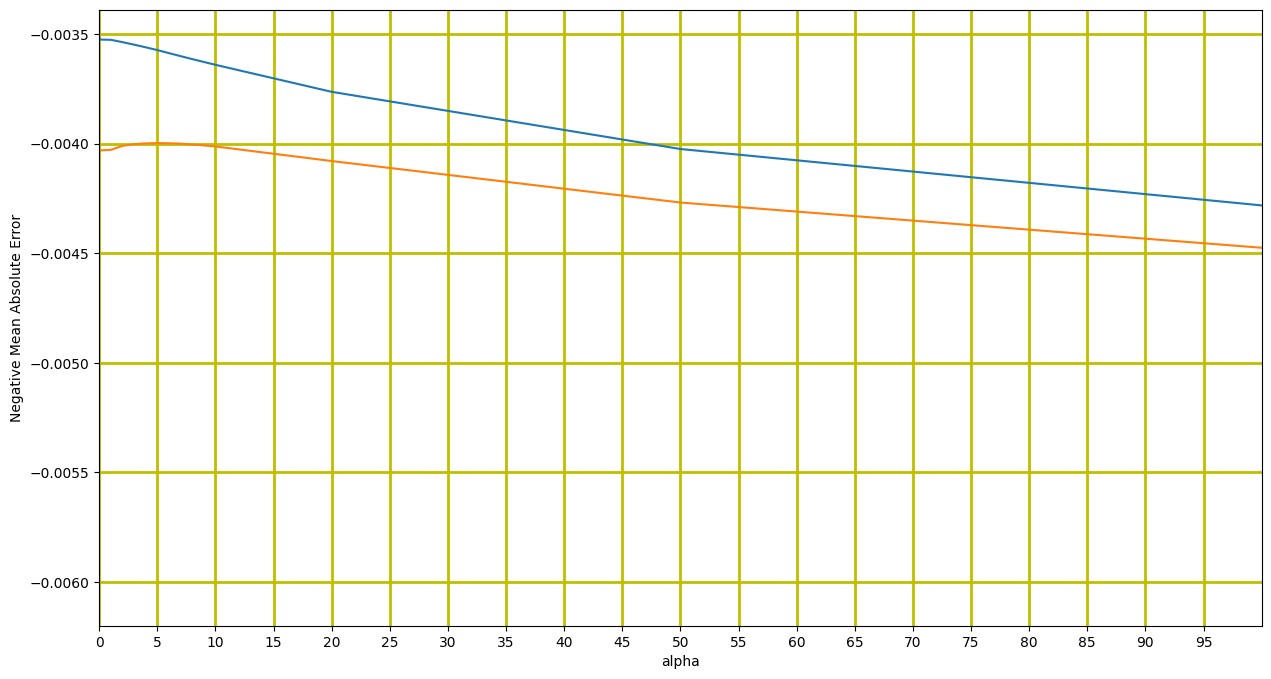

In [917]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='y', linestyle='-', linewidth=2)
plt.show()

In [918]:
# Setting alpha as 5.0, building a ridge regression model
alpha = 5.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=5.0)

In [919]:
#getting the ridge coeff
ridge_coef = ridge.coef_
ridge_coef

array([[ 2.48813655e-03,  2.35540494e-03,  2.03367115e-03,
         1.27932762e-03, -1.59312815e-04, -3.15368596e-03,
        -5.30377637e-04,  5.33973671e-04, -3.59603392e-06,
        -1.34953847e-03,  8.13900545e-04,  1.43826172e-03,
        -9.02623797e-04,  8.92051473e-04,  1.81086753e-03,
        -1.93416712e-03, -7.68751881e-04,  1.89778592e-03,
         4.94734586e-03, -2.98250804e-03, -4.72146325e-03,
         1.58733938e-03,  6.24020274e-03,  3.69439795e-03,
         2.46909590e-03,  4.55587564e-03, -9.41977688e-04,
        -8.74782277e-04,  6.57552963e-04,  7.51818918e-04,
         4.07388083e-04,  1.92574740e-03, -1.70172653e-03,
         7.17419966e-04, -8.24712343e-04, -1.16728486e-04,
         2.04369737e-03, -2.81392656e-03, -8.77864366e-04,
         8.77864366e-04, -8.72491550e-04,  2.45813945e-03,
         5.13038252e-04, -8.09539386e-04, -2.52030316e-04,
        -3.77104868e-05,  7.26215371e-04,  7.99743991e-04,
        -2.48062554e-03, -4.47397838e-05, -1.77069916e-0

In [920]:
# predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.8678329115873785

In [921]:
# predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8133441704191595

In [922]:
#Displaing the co-efficients of the model
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(20)

Ridge Co-Efficient
Neighborhood_NoRidge            0.006240
Neighborhood_Crawfor            0.004947
KitchenQual_Ex                  0.004768
Neighborhood_StoneBr            0.004556
BsmtQual_Ex                     0.004266
Neighborhood_NridgHt            0.003694
BsmtExposure_Gd                 0.003167
BsmtFinType1_GLQ                0.002637
TotRmsAbvGrd                    0.002488
Neighborhood_Somerst            0.002469
Exterior1st_BrkFace             0.002458
Fireplaces                      0.002355
BsmtCond_Gd                     0.002290
GarageFinish_RFn                0.002273
HouseStyle_1.5Fin               0.002044
MSZoning_FV                     0.002034
BsmtCond_TA                     0.001936
BldgType_1Fam                   0.001926
Neighborhood_ClearCr            0.001898
LotConfig_CulDSac               0.001811

**The top 20 properties impacting the price of the property**

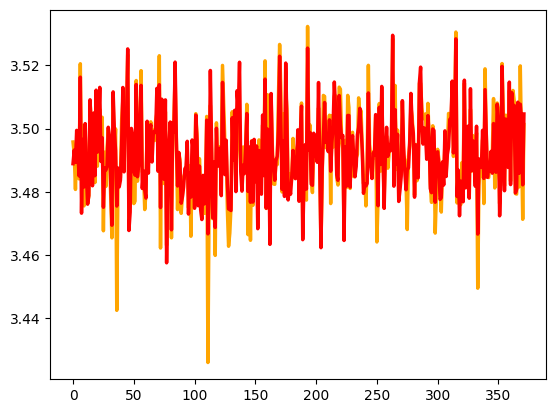

In [923]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='orange', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='red', linewidth=2.5, linestyle='-')
plt.show()

## 8. Building Model using Lasso

In [924]:
params = {'alpha': [0.00001,0.00009,0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [925]:
#building lasso model using cross validation technique
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [926]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.061305      0.026115         0.019355        0.006131     0.00001   
1        0.057500      0.020734         0.020565        0.005152     0.00009   
2        0.060827      0.022858         0.020482        0.006862      0.0001   
3        0.052512      0.018776         0.019877        0.006498       0.001   
4        0.040402      0.015573         0.014922        0.005442        0.01   
5        0.052253      0.015048         0.020545        0.007245        0.05   
6        0.043162      0.017580         0.018603        0.005804         0.1   
7        0.048470      0.013686         0.018069        0.007338         0.2   
8        0.046629      0.017140         0.020539        0.006729         0.3   
9        0.042752      0.017155         0.014708        0.005460         0.4   
10       0.036809      0.015293         0.014653        0.005320         0.5   
11       0.047239      0.017909         0.017975        0.007186         0.6   
12       0.037533      0.014734         0.018516        0.005964         0.7   
13       0.043055      0.017416         0.017895        0.007509         0.8   
14       0.046893      0.012468         0.018795        0.007232         0.9   
15       0.043344      0.018194         0.016646        0.008012         1.0   
16       0.051601      0.017515         0.017484        0.006962         2.0   
17       0.038880      0.015316         0.017513        0.004923         3.0   
18       0.066304      0.001521         0.025899        0.001278         4.0   
19       0.052156      0.018553         0.017928        0.006233         5.0   
20       0.041046      0.012439         0.014401        0.005328         6.0   
21       0.046505      0.018469         0.020722        0.007414         7.0   
22       0.042969      0.014090         0.016898        0.006293         8.0   
23       0.061370      0.002191         0.025720        0.001648         9.0   
24       0.064067      0.001781         0.025296        0.001331        10.0   
25       0.063608      0.002332         0.024598        0.000824          20   
26       0.034755      0.012989         0.017060        0.010343          50   
27       0.059438      0.015297         0.023271        0.005478         100   
28       0.033038      0.008691         0.015089        0.004608         500   
29       0.051024      0.018160         0.017322        0.006512        1000   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.003921          -0.004049   
1    {'alpha': 9e-05}          -0.004146          -0.004340   
2   {'alpha': 0.0001}          -0.004213          -0.004417   
3    {'alpha': 0.001}          -0.005639          -0.006522   
4     {'alpha': 0.01}          -0.010084          -0.010792   
5     {'alpha': 0.05}          -0.010497          -0.011235   
6      {'alpha': 0.1}          -0.010497          -0.011235   
7      {'alpha': 0.2}          -0.010497          -0.011235   
8      {'alpha': 0.3}          -0.010497          -0.011235   
9      {'alpha': 0.4}          -0.010497          -0.011235   
10     {'alpha': 0.5}          -0.010497          -0.011235   
11     {'alpha': 0.6}          -0.010497          -0.011235   
12     {'alpha': 0.7}          -0.010497          -0.011235   
13     {'alpha': 0.8}          -0.010497          -0.011235   
14     {'alpha': 0.9}          -0.010497          -0.011235   
15     {'alpha': 1.0}          -0.010497          -0.011235   
16     {'alpha': 2.0}          -0.010497          -0.011235   
17     {'alpha': 3.0}          -0.010497          -0.011235   
18     {'alpha': 4.0}          -0.010497          -0.011235   
19     {'alpha': 5.0}          -0.010497          -0.011235   
20     {'alpha': 6.0}          -0.010497          -0.011235   
21     {'alpha': 7.0}          -0.010497          -0.011235   
22     {'alpha': 8.0}          -0.010497          -0.011235   
23     {'al

In [927]:
model_cv.best_params_

{'alpha': 1e-05}

In [928]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

In [929]:
cv_results['mean_train_score']

0    -0.003537
1    -0.004023
2    -0.004094
3    -0.005753
4    -0.010054
5    -0.010546
6    -0.010546
7    -0.010546
8    -0.010546
9    -0.010546
10   -0.010546
11   -0.010546
12   -0.010546
13   -0.010546
14   -0.010546
15   -0.010546
16   -0.010546
17   -0.010546
18   -0.010546
19   -0.010546
20   -0.010546
21   -0.010546
22   -0.010546
23   -0.010546
24   -0.010546
25   -0.010546
26   -0.010546
27   -0.010546
28   -0.010546
29   -0.010546
Name: mean_train_score, dtype: float64

In [930]:
cv_results['mean_test_score']

0    -0.004022
1    -0.004318
2    -0.004376
3    -0.005833
4    -0.010069
5    -0.010553
6    -0.010553
7    -0.010553
8    -0.010553
9    -0.010553
10   -0.010553
11   -0.010553
12   -0.010553
13   -0.010553
14   -0.010553
15   -0.010553
16   -0.010553
17   -0.010553
18   -0.010553
19   -0.010553
20   -0.010553
21   -0.010553
22   -0.010553
23   -0.010553
24   -0.010553
25   -0.010553
26   -0.010553
27   -0.010553
28   -0.010553
29   -0.010553
Name: mean_test_score, dtype: float64

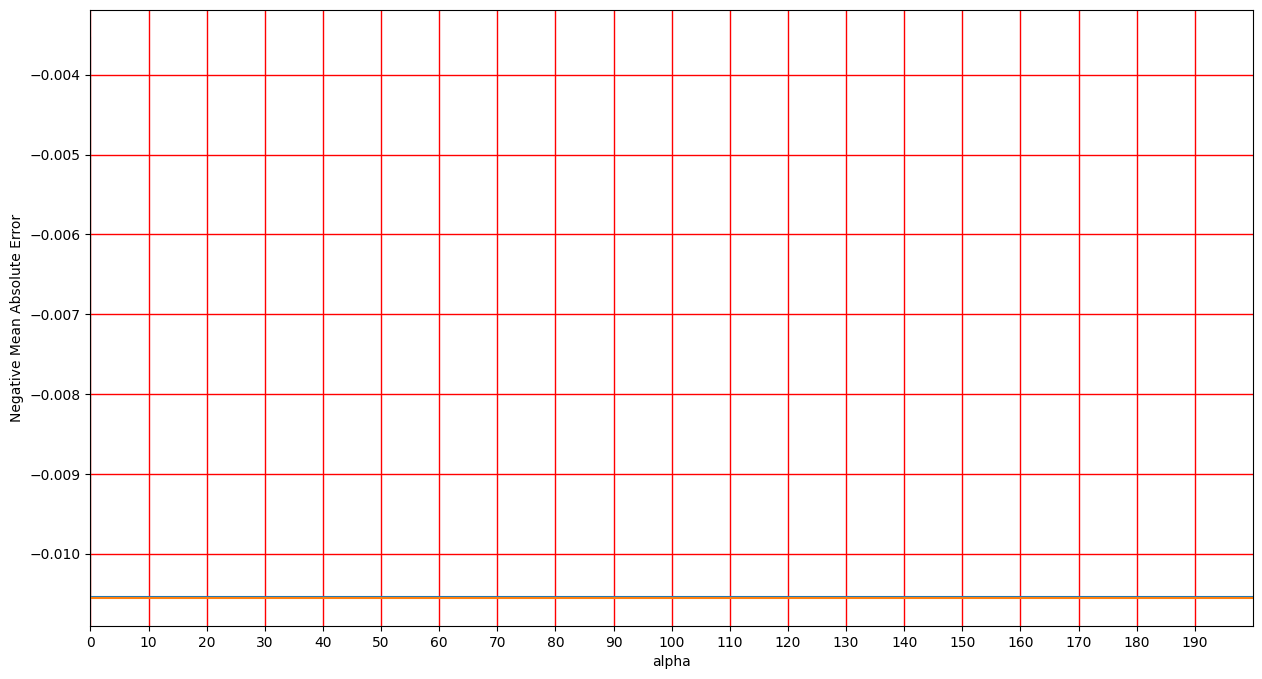

In [931]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [932]:
# Setting alpha as 0.0001, building a lasso regression model
alpha = 0.00001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [933]:
# predticting on X_train
y_train_pred_lasso = ridge.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.8678329115873785

In [934]:
# predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.8137740992237044

In [935]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)

In [936]:
model_params_lasso = [np.round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(array([3.472]), 'constant'),
 (-0.01, 'Condition1_Norm'),
 (0.008, 'MSZoning_RM'),
 (-0.007, 'MSZoning_RH'),
 (0.007, 'RoofStyle_Gambrel'),
 (0.006, 'MSZoning_C (all)'),
 (0.006, 'LotShape_IR3'),
 (0.006, 'Neighborhood_Veenker'),
 (-0.006, 'Exterior1st_CBlock'),
 (0.004, 'LotShape_IR1'),
 (-0.004, 'Condition1_PosN'),
 (-0.004, 'RoofStyle_Gable'),
 (-0.004, 'RoofStyle_Hip'),
 (-0.003, 'BsmtFinSF2'),
 (0.003, 'WoodDeckSF'),
 (-0.003, 'MSZoning_FV'),
 (0.003, 'LotShape_IR2'),
 (-0.003, 'Neighborhood_Blueste'),
 (0.003, 'Neighborhood_CollgCr'),
 (-0.003, 'Neighborhood_NAmes'),
 (0.003, 'Condition1_Feedr'),
 (0.003, 'BldgType_1Fam'),
 (0.003, 'HouseStyle_1.5Unf'),
 (0.003, 'RoofStyle_Mansard'),
 (-0.003, 'Exterior1st_VinylSd'),
 (0.002, 'MSSubClass'),
 (0.002, 'LotArea'),
 (0.002, 'OverallCond'),
 (0.002, 'Fireplaces'),
 (0.002, 'GarageArea'),
 (0.002, 'Age'),
 (0.002, 'MSZoning_RL'),
 (0.002, 'LotConfig_Corner'),
 (-0.002, 'LotConfig_CulDSac'),
 (0.002, 'Neighborhood_Blmngtn'),
 (-0.002,

In [937]:
#enhancing the lasso coeff to get values in better format
lasso_coef = lasso.coef_
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_coeff.head(20)

The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Neighborhood_NoRidge                          0.007512
KitchenQual_Ex                                0.006656
BsmtQual_Ex                                   0.006197
Neighborhood_Crawfor                          0.005973
Neighborhood_StoneBr                          0.005725
Neighborhood_NridgHt                          0.004042
BsmtExposure_Gd                               0.003490
Neighborhood_Somerst                          0.002807
BsmtFinType1_GLQ                              0.002762
BsmtQual_Gd                                   0.002751
Exterior1st_BrkFace                           0.002699
KitchenQual_Gd                                0.002611
LotConfig_CulDSac                             0.002510
TotRmsAbvGrd                                  0.002441
GarageFinish_RFn                              0.002339
Fireplaces                                    0.002285
Neighborhood_ClearCr                          0.002210
BldgType_1Fam                                 0.002033
HouseStyle_1.5Fin                             0.001991
MSZoning_FV                                   0.001990

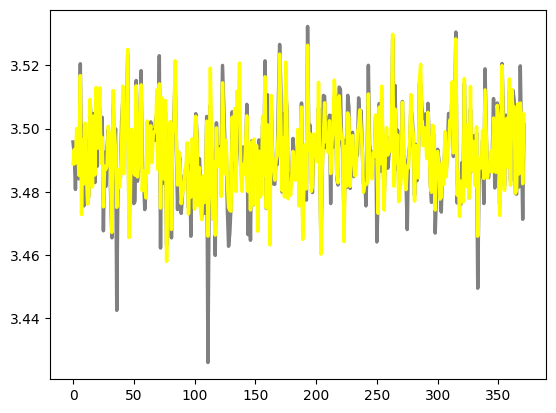

In [938]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='grey', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='yellow', linewidth=2.5, linestyle='-')
plt.show()

## 9. Inferences

#### 1. The scatter plots of numerical variables against Salesprice showed most of the variables have some linear relationship with Salesprice.
#### 2. Linear regression model was built after handling all null values from the data, removing highly multi-colinear and non -variant independent variables. It was found that both with LinearRegression Model and RFE selection ,model is overfitting on training data. 
#### 3. We then performed Ridge regression . Optimum alpha found was 5. R-sqaured value on test data came out to be 0.8137 . (Training R-squared = 0.86)
#### 4. We then performed Lasso regression . Optimum alpha found was 0.00001. R-sqaured value on test data came out to be 0.81334 . (Training R-squared = 0.8678)
#### 5. Below are the variables found to be significant in predicting the price of a house :- 

1. Neighbourhood
2. KitchenQuality
3. BsmtQual
4. Basement rating/Exposure
5. LotConfig
6. TotRmsAbvGrd
7. MSZoning
8. Fireplaces

## 10. Subjective Questions - Demonstration/Validation

#### 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


**Ans: The Optimal value of alpha for ridge is 5 and for lasso it is 0.00001.**

In [939]:
# Building Ridge Model by doubling the value of alpha to 10
ridge_double = Ridge(alpha=10,random_state=100)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.812919500441077
The MSE of the model on the test dataset for doubled alpha is 3.718349767624907e-05
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
Neighborhood_NoRidge                          0.005038
KitchenQual_Ex                                0.004260
BsmtQual_Ex                                   0.003986
Neighborhood_Crawfor                          0.003983
Neighborhood_StoneBr                          0.003536
Neighborhood_NridgHt                          0.003164
BsmtExposure_Gd                               0.002969
BsmtFinType1_GLQ                              0.002637
TotRmsAbvGrd                                  0.002583
Fireplaces                                    0.002417
Neighborhood_Somerst                          0.002294
GarageFinish_RFn                              0.002183
MSZoning_FV                                   0.002024
Exterior1st_BrkFace                           0.001977
BsmtCond_Gd                                   0.001966
BsmtCond_TA                                   0.001837
BldgType_1Fam                                 0.001836
HouseStyle_1.5Fin                             0.001769
LotConfig_CulDSac                             0.001600
GarageType_Attchd                             0.001386

In [940]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.00002,random_state=100)
lasso_double.fit(X_train,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8145066500964101
The MSE of the model on the test dataset for doubled alpha is 3.6868041091195666e-05
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Neighborhood_NoRidge                          0.006733
KitchenQual_Ex                                0.006463
BsmtQual_Ex                                   0.006271
Neighborhood_Crawfor                          0.005408
Neighborhood_StoneBr                          0.005215
Neighborhood_NridgHt                          0.003589
BsmtExposure_Gd                               0.003463
BsmtFinType1_GLQ                              0.002768
Neighborhood_Somerst                          0.002764
BsmtQual_Gd                                   0.002716
TotRmsAbvGrd                                  0.002528
KitchenQual_Gd                                0.002456
GarageFinish_RFn                              0.002405
Fireplaces                                    0.002314
LotConfig_CulDSac                             0.002307
BldgType_1Fam                                 0.002041
MSZoning_FV                                   0.001713
HouseStyle_1.5Fin                             0.001667
Exterior1st_BrkFace                           0.001587
GarageFinish_Fin                              0.001491

#### 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [941]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe2 = X_test.drop(['Neighborhood_NoRidge','KitchenQual_Ex','BsmtQual_Ex','Neighborhood_Crawfor','Neighborhood_StoneBr'],axis=1)
X_train_rfe2 = X_train.drop(['Neighborhood_NoRidge','KitchenQual_Ex','BsmtQual_Ex','Neighborhood_Crawfor','Neighborhood_StoneBr'],axis=1)

In [942]:
X_test_rfe2.head()
X_train_rfe2.shape

(868, 100)

In [943]:
# Building Lasso Model with the new dataset
lasso2 = Lasso(alpha=0.00001,random_state=100)
lasso2.fit(X_train_rfe2,y_train)
lasso2_coef = lasso2.coef_
y_test_pred = lasso2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso2_coeff = pd.DataFrame(np.atleast_2d(lasso2_coef),columns=X_train_rfe2.columns)
lasso2_coeff = lasso2_coeff.T
lasso2_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso2_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso2_coeff.head(10)

The R2 Score of the model on the test dataset is 0.8044519550935129
The MSE of the model on the test dataset is 3.8866478818041e-05
The most important predictor variables are as follows:


Lasso Co-Efficient
BsmtExposure_Gd                 0.003273
Exterior1st_BrkFace             0.003260
BsmtFinType1_GLQ                0.003164
LotConfig_CulDSac               0.002939
Neighborhood_NridgHt            0.002729
TotRmsAbvGrd                    0.002675
Fireplaces                      0.002581
GarageFinish_RFn                0.002134
LandContour_Low                 0.002053
HouseStyle_1.5Fin               0.002002